In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
import calendar
from sklearn import linear_model
import statsmodels.formula.api as smf
import os
# from math import floor, ceil

In [ ]:
# Files and locations
userloc = os.getcwd()
data_raw = userloc+'/data2025raw/' # download from x.com
data_proc = userloc+'/data2025proc/' # generating by CN code, run on HPC
data_post = userloc+'/data2025post/' # post-processing, generated by our scripts

In [ ]:
# import notes
notes = pd.read_parquet(data_post + 'notes.parquet', engine='auto')

In [ ]:
# note history with current status of helpfulness labels
notes_and_status = pd.read_parquet(data_post + 'notes_current_stat.parquet',\
                                    engine='auto')

# note that the labels agree with finalRatingStatus in more than 95% of the times 

In [ ]:
# # limit notes to 2024 and before
# notes = notes[notes.createdAt < pd.Timestamp(2025, 7, 1)]

In [6]:
users_no = len(notes['noteAuthorParticipantId'].unique())
print(f"Number of unique note authors: {users_no}")

first_note_date = \
    datetime.fromtimestamp(notes['createdAtMillis'].min()/1000).\
    strftime("%B %d, %Y")
last_note_date = \
    datetime.fromtimestamp(notes['createdAtMillis'].max()/1000).\
    strftime("%B %d, %Y")
print(f"The first note we have was created at {first_note_date} \
and the last one at {last_note_date}.")

Number of unique note authors: 263302
The first note we have was created at January 28, 2021 and the last one at July 01, 2025.


In [7]:
# notes per month and year
notes.groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count()

createdAtYear  createdAtMonth
2021           1                    964
               2                   1932
               3                   1645
               4                   1218
               5                   1193
               6                   1251
               7                   1173
               8                   1675
               9                   1931
               10                  1801
               11                  1495
               12                  1181
2022           1                   1079
               2                    940
               3                   1002
               4                   1029
               5                   1804
               6                   1686
               7                   1143
               8                   1064
               9                    853
               10                  1372
               11                  3804
               12                  3559
2023      

In [8]:
# notes per year
notes.groupby(['createdAtYear'])['noteId'].count()

createdAtYear
2021      17459
2022      19335
2023     377623
2024    1083773
2025     474441
Name: noteId, dtype: int64

In [6]:
# active authors per year
notes.groupby(['createdAtYear']).agg({'noteAuthorParticipantId': 'nunique'}).reset_index()


,createdAtYear,noteAuthorParticipantId
0,2021,3042
1,2022,3616
2,2023,65998
3,2024,185734


In [5]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [6]:
# active users per month
active_authors_monthly = notes.groupby(['createdAtYear', 'createdAtMonth'])\
    .agg({'noteAuthorParticipantId': 'nunique'}).reset_index()
active_authors_monthly.rename(columns={'noteAuthorParticipantId': 'count'}, inplace=True)

In [9]:
active_authors_monthly

,createdAtYear,createdAtMonth,count
0,2021,1,378
1,2021,2,643
2,2021,3,575
3,2021,4,459
4,2021,5,330
5,2021,6,459
6,2021,7,442
7,2021,8,700
8,2021,9,823
9,2021,10,713


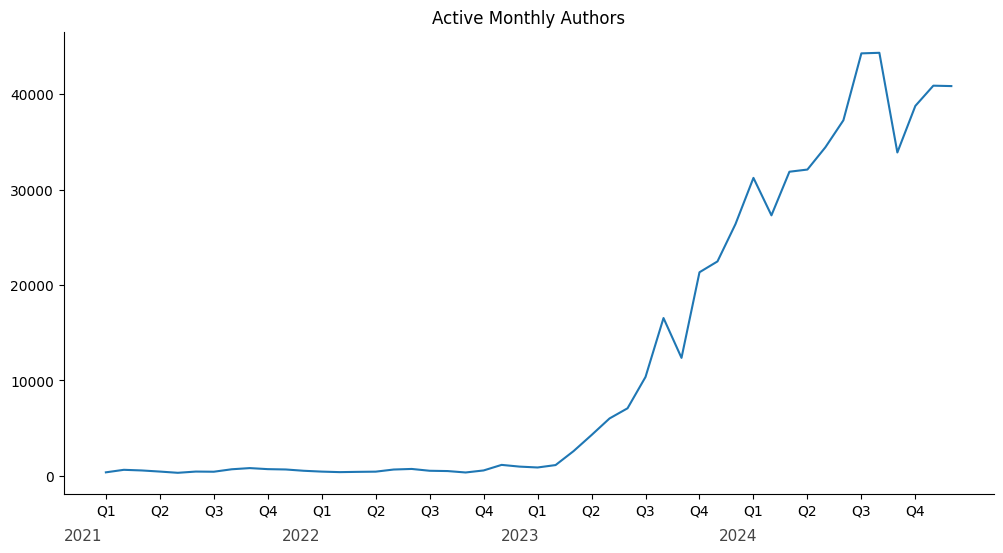

In [7]:
# plot active authors monthly
fig, ax = plt.subplots(figsize=(12,6))
# ax.plot(active_authors_monthly.index,active_authors_monthly['count'])
ax.plot(active_authors_monthly['count'])

ax.set_xticks(np.arange(0,len(active_authors_monthly), step=3))
# set quartely labels
labels = [''] * len(ax.get_xticks())
for idx, element in enumerate(labels):
    labels[idx] = 'Q' + str(idx%4 + 1)

ax.set_xticklabels(labels)
# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.235 , -.1, str(year), size=11, color='#444', transform=ax.transAxes)
ax.set_title('Active Monthly Authors')
ax.spines[['right', 'top']].set_visible(False)
# ax.set_xlabel('Percentage of Authors')
# ax.set_ylabel('Proportion of Total Helpful Notes')

In [8]:
new_authors_monthly

,createdAtYear,createdAtMonth,count
0,2021,1,378
1,2021,2,434
2,2021,3,316
3,2021,4,156
4,2021,5,96
5,2021,6,164
6,2021,7,105
7,2021,8,352
8,2021,9,411
9,2021,10,296


To check if the community is alive because of new users or not, let's see new users vs active users per month.

In [9]:
notes['createdAtYM'] = notes['createdAt'].dt.to_period('M')


In [10]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYM'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [11]:
# active users per month
active_authors_monthly = notes.groupby(['createdAtYM'])\
    .agg({'noteAuthorParticipantId': 'nunique'}).reset_index()
active_authors_monthly.rename(columns={'noteAuthorParticipantId': 'count'}, inplace=True)

/tmp/ipykernel_11627/339661148.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


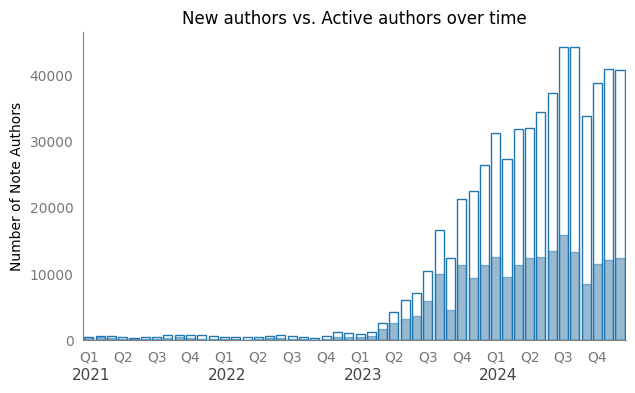

In [18]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
sns.barplot(x="createdAtYM", y="count", data=active_authors_monthly,
             color='white', edgecolor='tab:blue')
sns.barplot(x="createdAtYM", y="count", data=new_authors_monthly,
             edgecolor='tab:blue', alpha=.5)

# set quartely labels
labels = [''] * len(ax.get_xticklabels())
for idx, element in enumerate(labels[::3]):
    labels[idx*3] = 'Q' + str(idx%4 + 1)

ax.set_xticklabels(labels)
# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.25 -.02, -.13, str(year), size=11, color='#444', transform=ax.transAxes)
ax.set_xlabel(None)
ax.xaxis.set_label_coords(.48, -.15)
ax.set_ylabel('Number of Note Authors')
ax.tick_params(axis='both', colors="#777777", left=False, bottom=False)
ax.spines[['bottom', 'left']].set_color("grey")
# ax.legend(['Unmet Demand', 'Capacity'])
ax.spines[['right', 'top']].set_visible(False)
#update last month
ax.set_title(f'New authors vs. Active authors over time')
# add keydates
plt.show()

Qustion: what percentage of note authors from 2021, 2022, 2023 are still authoring notes in 2024?

In [3]:
# make a dict of the list of unique authors each year
distinct_authors_dict = {}

for year in range(2021, 2025):
    distinct_authors_dict[year] = notes[notes['createdAtYear'] == year]['noteAuthorParticipantId'].unique()

In [32]:
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])


Text(0.5, 1.0, 'Fraction of authors who remained active after their first note')

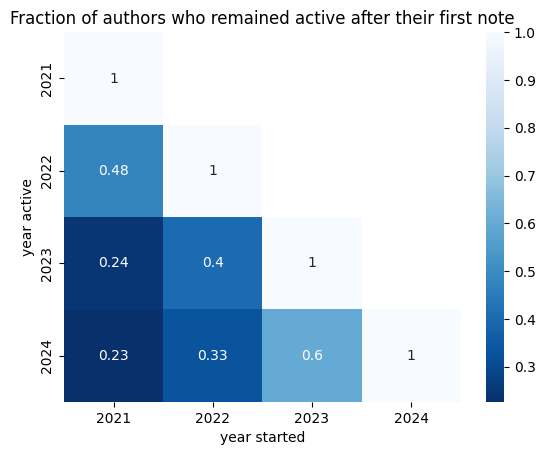

In [ ]:
# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title('Fraction of authors who remained active after their first note')


We want to know how the above heatmap look like for authors with more notes.

In [7]:
# make a dict of the list of unique authors each year
distinct_authors_dict = {}
# least number of notes the author have written
k = 5
df_k = notes[notes.groupby('noteAuthorParticipantId')['noteAuthorParticipantId'].transform('size').gt(k-1)]
for year in range(2021, 2025):
    distinct_authors_dict[year] = df_k[df_k['createdAtYear'] == year]['noteAuthorParticipantId'].unique()

In [8]:
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])


Text(0.5, 1.0, 'Fraction of 5+ authors who remained active after their first note')

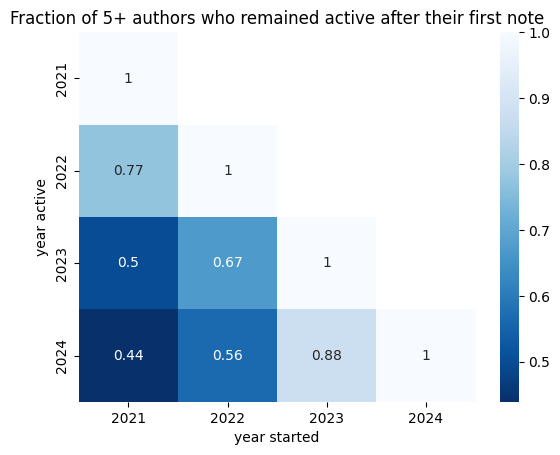

In [11]:
# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title(f'Fraction of {k}+ authors who remained active after their first note')


And for 10+ authors

Text(0.5, 1.0, 'Fraction of 10+ authors who remained active after their first note')

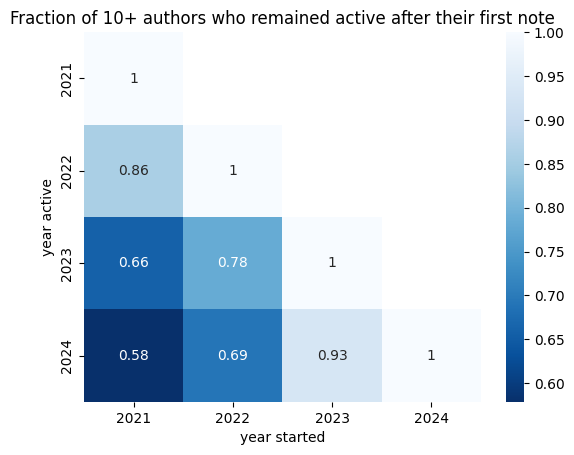

In [21]:
# make a dict of the list of unique authors each year
distinct_authors_dict = {}
# least number of notes the author have written
k = 10
df_k = notes[notes.groupby('noteAuthorParticipantId')['noteAuthorParticipantId'].transform('size').gt(k-1)]
for year in range(2021, 2025):
    distinct_authors_dict[year] = df_k[df_k['createdAtYear'] == year]['noteAuthorParticipantId'].unique()
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])

# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title(f'Fraction of {k}+ authors who remained active after their first note')


And for authors who had at least one note rated helpful

Text(0.5, 1.0, 'Fraction of helpful authors who remained active after their first note')

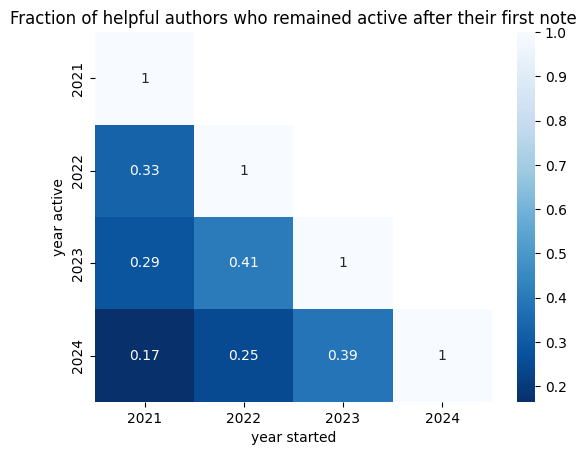

In [ ]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
helpful_authors = rated[rated['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']\
                    ['noteAuthorParticipantId'].unique()
# make a dict of the list of unique authors each year
distinct_authors_dict = {}
# create a year column
rated['Year'] = pd.to_datetime(rated['createdAtMillis'], unit='ms').dt.year
for year in range(2021, 2025): 
    year_authors = rated[rated['Year'] == year]['noteAuthorParticipantId'].unique()
    # find intersection of year authors with helpful ones. Since a helpful author could have started
    # with unhelpful notes
    distinct_authors_dict[year] = np.intersect1d(year_authors, helpful_authors)
# create a dateframe for comparing persistant authors during years
year_range = range(2021, 2025)
index = [year for year in year_range]
remain_active = pd.DataFrame(columns=index, index=index)
remain_active_matrix = np.empty(len(year_range))
for year_start in year_range:
    for year_active in year_range:
        if year_start <= year_active:
            remain_active.loc[year_active, year_start] = \
                len(np.intersect1d(distinct_authors_dict[year_start], distinct_authors_dict[year_active])) \
                    / len(distinct_authors_dict[year_start])

# plot
ax = plt.subplot()
# remove the upper triangle
mask = np.triu(np.ones_like(remain_active))
# set the diagonal to 0; so it wouldn't be masked
np.fill_diagonal(mask, 0)
sns.heatmap(remain_active.astype(float), annot = True, mask=mask, cmap='Blues_r', ax=ax)

ax.set_xlabel('year started')
ax.set_ylabel('year active')
ax.set_title(f'Fraction of helpful authors who remained active after their first note')


In [28]:
rated.columns

Index(['noteId', 'finalRatingStatus', 'firstTag', 'secondTag',
       'classification', 'createdAtMillis', 'numRatings', 'noteTopic',
       'topicNoteConfident', 'noteAuthorParticipantId', 'tweetId',
       'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'language'],
      dtype='object')

### notes authored per user per month or quarter. 
How long does the typical author have consecutive months > 0 on this measure?

In [5]:
col = ['noteAuthorParticipantId']
df_author = notes.groupby(col)
month_diff = df_author['createdAtMonth'].diff()
year_diff = df_author['createdAtYear'].diff()
nonconsecutive = ~((year_diff.eq(0) & month_diff.eq(1)) | (year_diff.eq(1) & month_diff.eq(-11)))
max_consecutive = notes.groupby([*col, nonconsecutive.cumsum()]).size().droplevel(-1).groupby(col).max().reset_index(name='counts')

In [6]:
max_consecutive.describe()

,counts
count,213216.000000
mean,1.557529
std,0.795287
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


In [23]:
# let's do the same for quarters
col = ['noteAuthorParticipantId']
notes['quarter'] = pd.PeriodIndex(notes.createdAt, freq='Q')
df_author = notes.groupby(col)

diff = df_author['quarter'].diff().apply(lambda x: x if pd.isnull(x) else x.n)
nonconsecutive = ~(diff.eq(1))
max_consecutive_q = notes.groupby([*col, nonconsecutive.cumsum()]).size().droplevel(-1).groupby(col).max().reset_index(name='counts')

In [24]:
max_consecutive_q.describe()

,counts
count,213216.000000
mean,1.480138
std,0.657977
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


array([[<Axes: title={'center': 'counts'}>]], dtype=object)

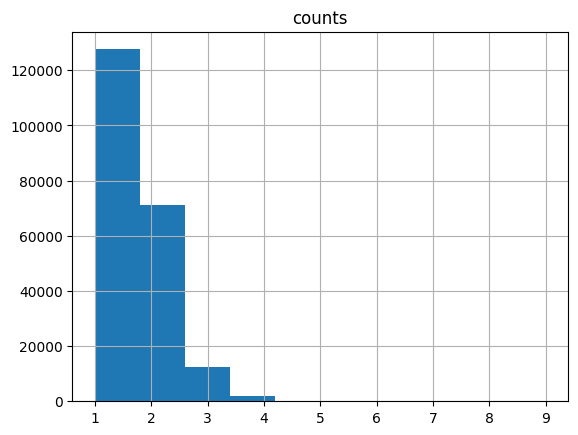

In [25]:
max_consecutive_q.hist()

Since we have used the date quarters, it does not show very accurate figures. E.g. Someone who has written only one note is counted in active in 1 quarter. Plus, if you write something in march and another in april, you were active for two quarters. Maybe having rolling quarters would be a better approach if we need it.

### Q4. What is distribution of authoring among participants? Can we identify superusers who author most notes? Do the questions 1 - 3, above, look different if we restrict our analyses superusers?

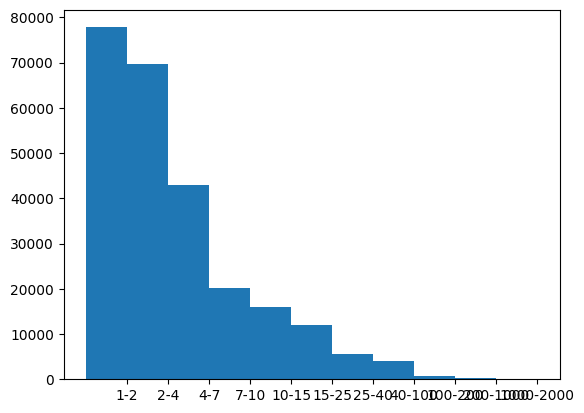

In [4]:
# let's see the distribution of notes per author first
count_notes_per_author = notes.groupby('noteAuthorParticipantId')['noteId'].count().to_list()
bins = [1, 2, 4, 7, 10, 15, 25, 40, 100, 200, 1000, 2000]
hist, bin_edges = np.histogram(count_notes_per_author,bins) # make the histogram

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1) 

# Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{}-{}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

plt.show()

There are some users who writes a lot! 


In [5]:
pd.DataFrame(count_notes_per_author).describe()

,0
count,249328.000000
mean,7.294524
std,107.484225
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,49377.000000


Someone has written more than 49000 notes! Could they be bots? 
Let's check some of their notes!

In [19]:
count_notes = notes.groupby('noteAuthorParticipantId')['noteId'].count().reset_index()
count_notes.sort_values(by='noteId', ascending=False, inplace=True)

In [4]:
count_notes.reset_index().loc[0, 'noteAuthorParticipantId']

'111F4A03D7F1923DCEC73DD8595474B5BFA1C4E88D3224D24348DD08B82C38D9'

In [21]:
# one author cannot be linked to any account
missing_author = count_notes.reset_index().loc[1, 'noteAuthorParticipantId']

In [5]:
star_author = count_notes.reset_index().loc[0,'noteAuthorParticipantId']
notes[notes['noteAuthorParticipantId'] == star_author]['summary'].sample(20)

1710372    ⚠️ Deceptive site ahead    Potential threats o...
1713658    This account appears to be impersonating @Onyx...
1718101    ⚠️ Deceptive site ahead    Potential threats o...
1698859    This account is impersonating @MustStopMurad. ...
1707395    ⚠️ Deceptive site ahead    Potential threats o...
1680045    This account is impersonating @BabyDogeCoin. L...
1685121    This account is impersonating @MustStopMurad. ...
1672633    This account is impersonating @pacmoon_. Lette...
1716290    ⚠️ Deceptive site ahead    Potential threats o...
1687665    ⚠️ Deceptive site ahead    Potential threats o...
1679395    ⚠️ Deceptive site ahead    Potential threats o...
1712482    ⚠️ Deceptive site ahead    Potential threats o...
1692246    This account is impersonating @NonPlayableCoin...
1675292    ⚠️ Deceptive site ahead ⚠️    Potential threat...
1678867    ⚠️ Deceptive site ahead    Potential threats o...
1683715    ⚠️ Deceptive site ahead    Potential threats o...
1713844    This account 

In [ ]:
## save Id and count notes for authors with more than 1000 notes
# df = count_notes[count_notes['noteId'] > 1000]
# df.rename(columns={'noteId': 'count'}, inplace=True)
# df.to_csv('star_authors.csv')

/tmp/ipykernel_4840/2548948843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'noteId': 'count'}, inplace=True)


In [ ]:
# find top five super authors
super_authors = count_notes.reset_index().loc[0:5,'noteAuthorParticipantId'].to_list()

df = pd.DataFrame(columns=['noteId', 'tweetId', 'noteAuthorParticipantId', 'summary', 'createdAt'])
# find and save their notes in a csv
for author in super_authors:
    df = pd.concat([df, notes[notes['noteAuthorParticipantId'] == author]], axis=0, join='inner')
# df.to_csv('notes_by_top_5_authors.csv')

/tmp/ipykernel_8147/829358889.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, notes[notes['noteAuthorParticipantId'] == author]], axis=0, join='inner')


In [3]:
notes.columns

Index(['noteId', 'noteAuthorParticipantId', 'createdAtMillis', 'tweetId',
       'classification', 'believable', 'harmful', 'validationDifficulty',
       'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'createdAt', 'createdAtYear', 'createdAtMonth'],
      dtype='object')

Some similar notes. They may be rated helpful though. Let's check it!

In [11]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')

In [61]:
rated[rated['noteAuthorParticipantId'] == star_author]['finalRatingStatus'].describe()

count                        1197
unique                          1
top       CURRENTLY_RATED_HELPFUL
freq                         1197
Name: finalRatingStatus, dtype: object

About half of them are rated and all of them are rated helpful! Impressive!

In [26]:
#TODO 
# identify superusers and run analysis on them, instead of the whole authors
# how to define a superusers?


### Trendline of helpful/unpublished note authors among one note authors and the ones who have written multiple notes


In [2]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')

In [3]:
# for some reasons (probably from scored notes) 
# there are lots of nans in summary column (and author id col)
print(f"before: {pd.isna(rated['summary']).sum()}")
rated.dropna(subset=['summary'], inplace=True)
print(f"after: {pd.isna(rated['summary']).sum()}")

before: 237308
after: 0


In [4]:
rated = rated[rated.createdAt < pd.Timestamp(2025, 1, 1)]
one_time_author = rated.groupby('noteAuthorParticipantId')\
    .filter(lambda group: len(group) == 1)
one_time_author.set_index('createdAt', inplace=True)
# replace unhelpful and needsMoreRating with unplublished
one_time_author['finalRatingStatus'] = one_time_author['finalRatingStatus']\
    .replace({'NEEDS_MORE_RATINGS': 'UNPUBLISHED', 'CURRENTLY_RATED_NOT_HELPFUL': 'UNPUBLISHED'})
df_o = one_time_author.groupby('finalRatingStatus')['noteId'].resample('MS')\
    .count().groupby(level=0).cumsum().reset_index()
df_o.rename(columns={'noteId': 'cumcount'}, inplace=True)


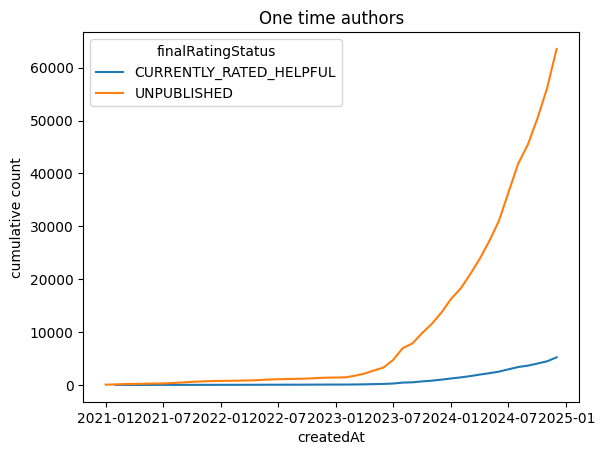

In [87]:
ax = plt.subplot()
ax = sns.lineplot(x='createdAt', y='cumcount', hue='finalRatingStatus', data=df_o)
ax.set_title('One time authors')
ax.set_ylabel('cumulative count')
plt.show()

In [19]:
rated = rated[rated.createdAt < pd.Timestamp(2025, 1, 1)]
multiple_time_author = rated.groupby('noteAuthorParticipantId')\
    .filter(lambda group: len(group) > 1)

helpful_authors = multiple_time_author.groupby('noteAuthorParticipantId')\
    .apply(lambda group: (group['finalRatingStatus']=='CURRENTLY_RATED_HELPFUL').any())\
    .reset_index()
# rename if_helpful column
helpful_authors.rename(columns={0: 'if_helpful'}, inplace=True)
# groupby authors again to keep the first note only (for the sake of counting)
multiple_time_author = multiple_time_author.groupby('noteAuthorParticipantId').head(1)
# merge with helpfulness if any
multiple_time_author = \
    pd.merge(multiple_time_author, helpful_authors, on='noteAuthorParticipantId')
multiple_time_author.set_index('createdAt', inplace=True)
df_m = multiple_time_author.groupby('if_helpful')['noteId'].resample('MS')\
    .count().groupby(level=0).cumsum().reset_index()
df_m.rename(columns={'noteId': 'cumcount'}, inplace=True)

/tmp/ipykernel_6162/3683101398.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: (group['finalRatingStatus']=='CURRENTLY_RATED_HELPFUL').any())\


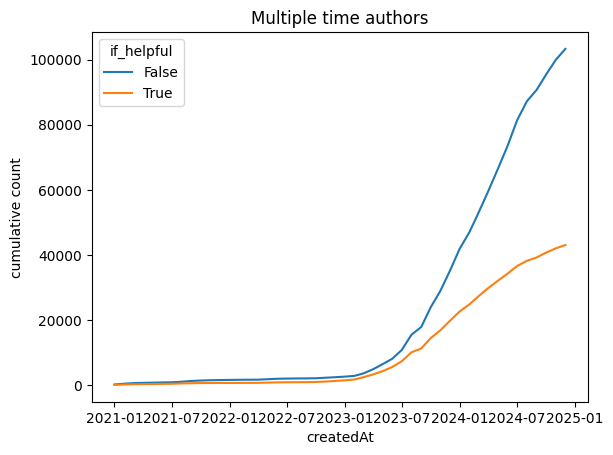

In [89]:
ax = plt.subplot()
ax = sns.lineplot(x='createdAt', y='cumcount', hue='if_helpful', data=df_m)
ax.set_title('Multiple time authors')
ax.set_ylabel('cumulative count')
plt.show()

And I would like to see figure of multiple time note authors with 1st note published/unpublished.

In [21]:
rated = rated[rated.createdAt < pd.Timestamp(2025, 1, 1)]
# keep the first note from the authors who have multiple
multiple_time_author = rated.groupby('noteAuthorParticipantId')\
    .filter(lambda group: len(group) > 1)\
    .groupby('noteAuthorParticipantId').head(1)

multiple_time_author.set_index('createdAt', inplace=True)
# replace unhelpful and needsMoreRating with unplublished
multiple_time_author['finalRatingStatus'] = multiple_time_author['finalRatingStatus']\
    .replace({'NEEDS_MORE_RATINGS': 'UNPUBLISHED', 'CURRENTLY_RATED_NOT_HELPFUL': 'UNPUBLISHED'})
df_m_f = multiple_time_author.groupby('finalRatingStatus')['noteId'].resample('MS')\
    .count().groupby(level=0).cumsum().reset_index()

df_m_f.rename(columns={'noteId': 'cumcount'}, inplace=True)

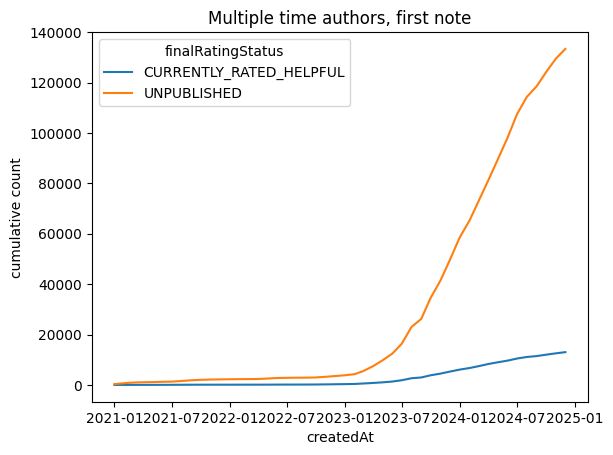

In [91]:
ax = plt.subplot()
ax = sns.lineplot(x='createdAt', y='cumcount', hue='finalRatingStatus', data=df_m_f)
ax.set_title('Multiple time authors, first note')
ax.set_ylabel('cumulative count')
plt.show()

In [11]:
print(f"Number of multiple note authors, with first note published:\
 {df_m_f[df_m_f['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']['cumcount'].iloc[-1]} vs.\
 unpublished: {df_m_f[df_m_f['finalRatingStatus'] == 'UNPUBLISHED']['cumcount'].iloc[-1]}")
print(f"Number of one-time note authors, with note published:\
 {df_o[df_o['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']['cumcount'].iloc[-1]} vs.\
 unpublished: {df_o[df_o['finalRatingStatus'] == 'UNPUBLISHED']['cumcount'].iloc[-1]}")
print(f"Number of multiple note authors, with at least one note published:\
 {df_m[df_m['if_helpful'] == True]['cumcount'].iloc[-1]} vs.\
 unpublished: {df_m[df_m['if_helpful'] == False]['cumcount'].iloc[-1]}")

Number of multiple note authors, with first note published: 13012 vs. unpublished: 133336
Number of one-time note authors, with note published: 5222 vs. unpublished: 63545
Number of multiple note authors, with at least one note published: 43059 vs. unpublished: 103289


### Q. Rolling share of new vs older authors (6 months rolling window)

In [10]:
 # what fraction of notes were written by new (less than 3 months in CN) users

 #create a df from authors and when they joined
authors = notes.groupby('noteAuthorParticipantId')[['createdAt', 'createdAtYear', 'createdAtMonth']]\
    .first().reset_index()
# sort by date and make it the index, so the search would be easier
authors.sort_values(by='createdAt', inplace=True)
authors.set_index('createdAt', inplace=True)

In [ ]:
share_new_authors = dict()
# start from Jan 23
df = notes[(notes.createdAt >= pd.Timestamp(2023, 1, 1)) &
           (notes.createdAt < pd.Timestamp(2025, 1, 1))]
df_monthly = df.groupby(['createdAtYear', 'createdAtMonth'])['noteAuthorParticipantId']
for (year, month), notes_month in df_monthly:
    # count notes by new authors
    if_new = 0
    current_month = pd.Timestamp(year, month, 1)
    # create a list of authors joined in the past 4 months
    authors_new = authors.loc[(current_month - pd.DateOffset(months=4)): (current_month + pd.DateOffset(months=1))]\
        ['noteAuthorParticipantId'].to_list()
    for author, count in notes_month.value_counts().items():
        if author in authors_new:
            if_new += count

    share_new_authors[(year, month)] = if_new / len(notes_month)

In [20]:
#save share_new_authors
with open('share_new_authors_4.pkl', 'wb') as f:
    pickle.dump(share_new_authors, f)


In [14]:
# load share_new_authors
with open('share_new_authors_4.pkl', 'rb') as f:
    share_new_authors = pickle.load(f)

[]

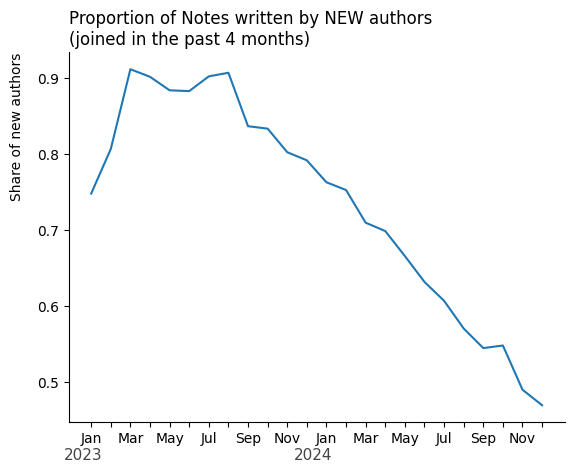

In [28]:
ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors)), y=share_new_authors.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
# add years
for idx, year in enumerate(range(2023,2025)):
    ax.text(idx*.465 -.01, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.yaxis.set_label_coords(-.09, .8)
ax.set_title(f'Proportion of Notes written by NEW authors\n(joined in the past 4 months)',
             loc='left',
             x=0, y=1)
ax.spines[['right', 'top']].set_visible(False)
plt.plot()

Another way of showing the above plot

[]

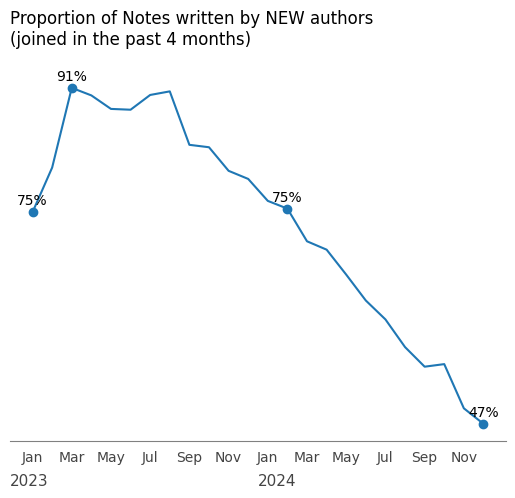

In [34]:
ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors)), y=share_new_authors.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
ax.tick_params(axis='both', colors="#444444", labelleft=False, left=False, bottom=False)
ax.spines[['bottom']].set_color("grey")

# add years
for idx, year in enumerate(range(2023,2025)):
    ax.text(idx*.5, -.12, str(year), size=11, color='#444', transform=ax.transAxes)

ax.set_title(f'Proportion of Notes written by NEW authors\n(joined in the past 4 months)',
             loc='left',
             x=0, y=1.05)
ax.spines[['right', 'top', 'left']].set_visible(False)

# mark start and end proportions for 2024
for month in [14,24]:
    x = month-1
    y = share_new_authors[2024, month-12]
    ax.plot(x,
            y,
            marker='o',
            color='tab:blue')
    ax.text(x,
            y+.01,
            f"{y*100:.0f}%",
            ha='center')
# mark start and pick proportions for 2023
for month in [1,3]:
    x = month-1
    y = share_new_authors[2023, month]
    ax.plot(x,
            y,
            marker='o',
            color='tab:blue')
    ax.text(x,
            y+.01,
            f"{y*100:.0f}%",
            ha='center')
plt.plot()

In [32]:
share_new_authors

{(np.int32(2023), np.int32(1)): 0.7479546054367907,
 (np.int32(2023), np.int32(2)): 0.8067570076109152,
 (np.int32(2023), np.int32(3)): 0.9118804091266719,
 (np.int32(2023), np.int32(4)): 0.9019101352729251,
 (np.int32(2023), np.int32(5)): 0.8841028081865778,
 (np.int32(2023), np.int32(6)): 0.8830442081701175,
 (np.int32(2023), np.int32(7)): 0.9025008143027758,
 (np.int32(2023), np.int32(8)): 0.9072286068270176,
 (np.int32(2023), np.int32(9)): 0.8367564425498935,
 (np.int32(2023), np.int32(10)): 0.8335685871936354,
 (np.int32(2023), np.int32(11)): 0.8024781223208942,
 (np.int32(2023), np.int32(12)): 0.7917905373878498,
 (np.int32(2024), np.int32(1)): 0.7628335864612714,
 (np.int32(2024), np.int32(2)): 0.7526399812528377,
 (np.int32(2024), np.int32(3)): 0.7095626191835396,
 (np.int32(2024), np.int32(4)): 0.6985260656317945,
 (np.int32(2024), np.int32(5)): 0.6656079645200037,
 (np.int32(2024), np.int32(6)): 0.6314701530906687,
 (np.int32(2024), np.int32(7)): 0.6065747418644708,
 (np.int3

In [8]:
# Redo analysis with 6 months
share_new_authors_6 = dict()
# start from Jan 2024
df = notes[notes.createdAt >= pd.Timestamp(2024, 1, 1)]
df_monthly = df.groupby(['createdAtYear', 'createdAtMonth'])['noteAuthorParticipantId']
for (year, month), notes_month in df_monthly:
    # count notes by new authors
    if_new = 0
    current_month = pd.Timestamp(year, month, 1)
    # create a list of authors joined in the past 6 months
    authors_new = authors.loc[(current_month - pd.DateOffset(months=6)): (current_month + pd.DateOffset(months=1))]\
        ['noteAuthorParticipantId'].to_list()
    for author, count in notes_month.value_counts().items():
        if author in authors_new:
            if_new += count

    share_new_authors_6[(year, month)] = if_new / len(notes_month)
#save share_new_authors
with open('share_new_authors_6.pkl', 'wb') as f:
    pickle.dump(share_new_authors_6, f)

[]

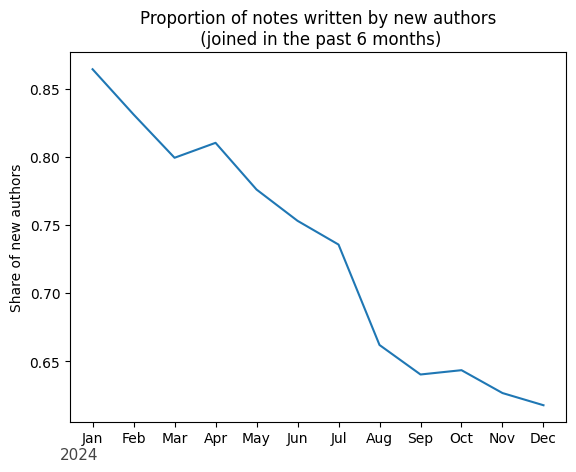

In [11]:
# load share_new_authors
with open('share_new_authors_6.pkl', 'rb') as f:
    share_new_authors_6 = pickle.load(f)
ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors_6)), y=share_new_authors_6.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors_6.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
# add years
for idx, year in enumerate(range(2024,2025)):
    ax.text(idx*.5 -.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.set_title('Proportion of notes written by new authors\n (joined in the past 6 months)')
plt.plot()

### Cumulative note authors vs 10+ note authors over time

In [2]:
# cumulative number of authors
cum_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
cum_authors_monthly['cum_authors'] = cum_authors_monthly['noteId'].cumsum()
cum_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

NameError: name 'notes' is not defined

In [ ]:
# cumulative number of authors with more than 10 notes
df_10 = notes[notes.groupby('noteAuthorParticipantId')['noteAuthorParticipantId'].transform('size').gt(9)]
cum_authors_monthly_10 = df_10.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
cum_authors_monthly_10['cum_authors'] = cum_authors_monthly_10['noteId'].cumsum()
cum_authors_monthly_10.rename(columns={'noteId': 'count'}, inplace=True)

[]

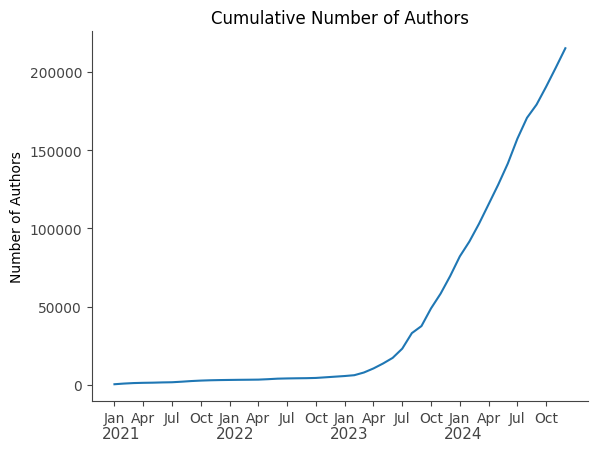

In [ ]:
# first just show the growth of authors
ax = sns.lineplot(x=range(len(cum_authors_monthly)), y=cum_authors_monthly['cum_authors'])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax.set_xticks(x_locs[::3])
ax.set_xticklabels(x_labels[::3])

# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 +.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
ax.set_ylabel('Number of Authors')
# ax.yaxis.set_label_coords(-.14, .85)
ax.set_title('Cumulative Number of Authors')
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#444444')
ax.tick_params(axis='both', colors='#444444')
plt.plot()

[]

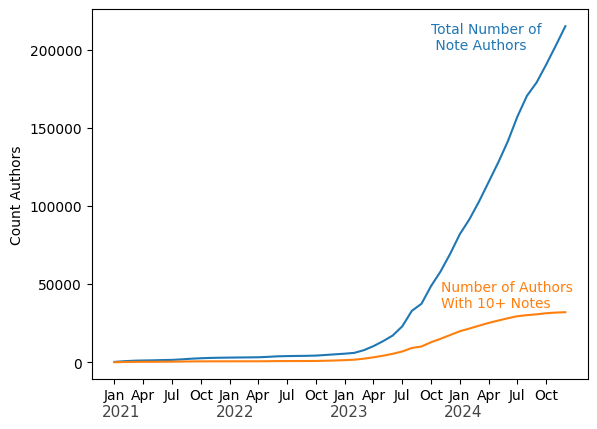

In [ ]:
ax = sns.lineplot(x=range(len(cum_authors_monthly)), y=cum_authors_monthly['cum_authors'])
# add authors with more than 10 notes
sns.lineplot(x=range(len(cum_authors_monthly_10)), y=cum_authors_monthly_10['cum_authors'])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax.set_xticks(x_locs[::3])
ax.set_xticklabels(x_labels[::3])

# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 +.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
ax.text(33, 200000, f'Total Number of\n Note Authors', color='tab:blue')
ax.text(34, 35000, f'Number of Authors\nWith 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
ax.set_ylabel('Count Authors')
# ax.set_title('Proportion of notes written by new authors\n (joined in the past 6 months)')
plt.plot()

Proportion of these two lines is not obvious. Let's make it in numbers.

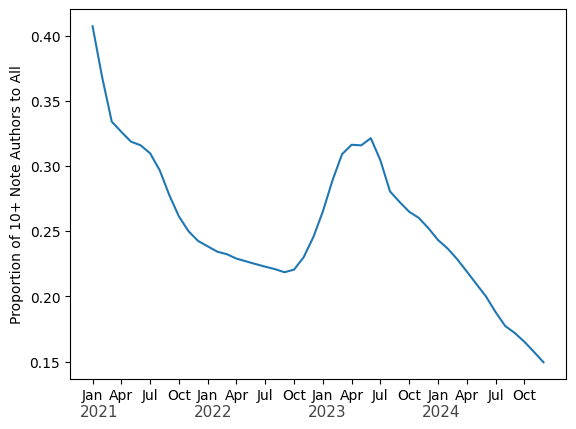

In [ ]:
proportion_10_plus = cum_authors_monthly_10['cum_authors'] / cum_authors_monthly['cum_authors']
ax = sns.lineplot(x=range(len(cum_authors_monthly)), y=proportion_10_plus)
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax.set_xticks(x_locs[::3])
ax.set_xticklabels(x_labels[::3])

# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 +.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)

ax.set_ylabel('Proportion of 10+ Note Authors to All')
plt.show()

[]

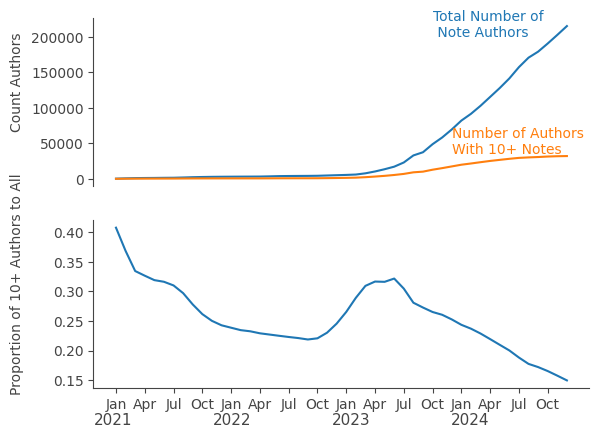

In [ ]:
# merge two plots
fig, (ax1, ax2) = plt.subplots(2,1)



sns.lineplot(x=range(len(cum_authors_monthly)), y=cum_authors_monthly['cum_authors'], ax=ax1)
# add authors with more than 10 notes
sns.lineplot(x=range(len(cum_authors_monthly_10)), y=cum_authors_monthly_10['cum_authors'], ax=ax1)



ax1.text(33, 200000, f'Total Number of\n Note Authors', color='tab:blue')
ax1.text(35, 35000, f'Number of Authors\nWith 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
ax1.set_ylabel('Count Authors', color='#444')
ax1.yaxis.set_label_coords(-.14, .62)

proportion_10_plus = cum_authors_monthly_10['cum_authors'] / cum_authors_monthly['cum_authors']
sns.lineplot(x=range(len(cum_authors_monthly)), y=proportion_10_plus, ax=ax[1])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# ax.get_xaxis().set_visible(False)
ax2.set_xticks(x_locs[::3])
ax2.set_xticklabels(x_labels[::3])
ax2.set_ylabel('Proportion of 10+ Authors to All', color='#444')
ax2.yaxis.set_label_coords(-.14, .62)
# add years
for idx, year in enumerate(range(2021,2025)):
    ax2.text(idx*.24 , -.22, str(year), size=11, color='#444', transform=ax2.transAxes)
# beautify the plot
ax1.spines[['top', 'right', 'bottom']].set_visible(False)
ax1.spines[['left']].set_color('#444444')
ax1.tick_params(axis='both', colors='#444444', labelbottom=False, bottom=False)
ax2.spines[['top', 'right']].set_visible(False)
ax2.spines[['left', 'bottom']].set_color('#444444')
ax2.tick_params(axis='both', colors='#444444')
plt.plot()

[]

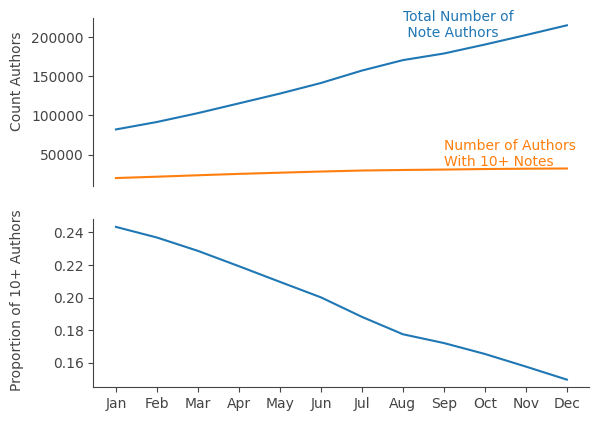

In [ ]:
# above plot, only for 2024
# merge two plots
fig, (ax1, ax2) = plt.subplots(2,1)

cum_authors_monthly_24 = cum_authors_monthly[cum_authors_monthly['createdAtYear'] == 2024]
cum_authors_monthly_10_24 = cum_authors_monthly_10[cum_authors_monthly_10['createdAtYear'] == 2024]

sns.lineplot(x=range(len(cum_authors_monthly_24)), y=cum_authors_monthly_24['cum_authors'], ax=ax1)
# add authors with more than 10 notes
sns.lineplot(x=range(len(cum_authors_monthly_10_24)), y=cum_authors_monthly_10_24['cum_authors'], ax=ax1)



ax1.text(7, 200000, f'Total Number of\n Note Authors', color='tab:blue')
ax1.text(8, 35000, f'Number of Authors\nWith 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
ax1.set_ylabel('Count Authors', color='#444')
ax1.yaxis.set_label_coords(-.14, .62)

proportion_10_plus = cum_authors_monthly_10_24['cum_authors'] / cum_authors_monthly_24['cum_authors']
sns.lineplot(x=range(len(cum_authors_monthly_24)), y=proportion_10_plus, ax=ax2)
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly_24['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# # ax.get_xaxis().set_visible(False)
ax2.set_xticks(x_locs)
ax2.set_xticklabels(x_labels)
ax2.set_ylabel('Proportion of 10+ Authors', color='#444')
ax2.yaxis.set_label_coords(-.14, .52)
# add years
# for idx, year in enumerate(range(2021,2025)):
#     ax2.text(idx*.29 +.05, -.11, str(year), size=11, color='#444', transform=ax.transAxes)
# beautify the plot
ax1.spines[['top', 'right', 'bottom']].set_visible(False)
ax1.spines[['left']].set_color('#444444')
ax1.tick_params(axis='both', colors='#444444', labelbottom=False, bottom=False)
ax2.spines[['top', 'right']].set_visible(False)
ax2.spines[['left', 'bottom']].set_color('#444444')
ax2.tick_params(axis='both', colors='#444444')
plt.plot()

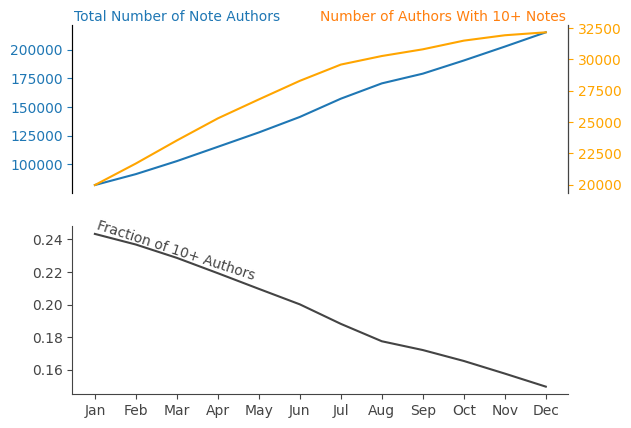

In [ ]:
# above plot, only for 2024
# merge two plots
# dual y axis for the first plot
fig, ax = plt.subplots(2,1)

cum_authors_monthly_24 = cum_authors_monthly[cum_authors_monthly['createdAtYear'] == 2024]
cum_authors_monthly_10_24 = cum_authors_monthly_10[cum_authors_monthly_10['createdAtYear'] == 2024]

sns.lineplot(x=range(len(cum_authors_monthly_24)), y=cum_authors_monthly_24['cum_authors'], ax=ax[0])
# add authors with more than 10 notes
ax1 = ax[0].twinx()
sns.lineplot(x=range(len(cum_authors_monthly_10_24)), 
             y=cum_authors_monthly_10_24['cum_authors'],
            color='orange', ax=ax1)



ax[0].text(-.5, 225000, f'Total Number of Note Authors', color='tab:blue', ha='left')
ax[0].text(5.5, 225000, f'Number of Authors With 10+ Notes', color='#ff7f0e')
# ax.set_xlabel('Time')
# ax[0].set_ylabel('Total Number of Authors', color='#444')
# ax[0].yaxis.set_label_coords(-.14, .62)

proportion_10_plus = cum_authors_monthly_10_24['cum_authors'] / cum_authors_monthly_24['cum_authors']
sns.lineplot(x=range(len(cum_authors_monthly_24)), 
             y=proportion_10_plus, 
             color='#444444', ax=ax[1])
x_labels = [calendar.month_abbr[month] for month in cum_authors_monthly_24['createdAtMonth']]
x_locs = [i for i in range(len(x_labels))]
# # ax.get_xaxis().set_visible(False)
ax[1].set_xticks(x_locs)
ax[1].set_xticklabels(x_labels)
# ax[1].set_ylabel('Proportion of 10+ Authors to All', color='#444')
# ax[1].yaxis.set_label_coords(-.14, .52)
ax[1].text(0, .215, f'Fraction of 10+ Authors', color='#444444', rotation=-18)
# add years
# for idx, year in enumerate(range(2021,2025)):
#     ax[1].text(idx*.29 +.05, -.11, str(year), size=11, color='#444', transform=ax.transAxes)
# beautify the plot
ax[0].spines[['top', 'bottom']].set_visible(False)
ax1.spines[['top', 'bottom']].set_visible(False)
axyl = ax1.get_ylabel()
ax1.set_ylabel(axyl).set_visible(False)
axyl = ax[0].get_ylabel()
ax[0].set_ylabel(axyl).set_visible(False)
axyl = ax[1].get_ylabel()
ax[1].set_ylabel(axyl).set_visible(False)
ax[0].spines[['left']].set_color('#444444')
ax[0].tick_params(axis='both', colors='tab:blue', labelbottom=False, bottom=False)
ax1.tick_params(axis='both', colors='orange')
ax1.spines[['right']].set_color('#444444')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].spines[['left', 'bottom']].set_color('#444444')
ax[1].tick_params(axis='both', colors='#444444')
plt.show()

Another way to see how 10+ authors are growing is to look at how many new users vs 10+ users joined each month. Each 10+ user should be counted once they reach 10 notes.

In [7]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [8]:
# keep notes written by 10+ authors
notes_10_plus = notes.groupby('noteAuthorParticipantId')\
    .filter(lambda group: len(group) >= 10, dropna=True)

In [9]:
# keep only the 10th note!
notes_10th = notes_10_plus.groupby('noteAuthorParticipantId').head(10)\
            .groupby('noteAuthorParticipantId').apply(lambda group: group.iloc[9, :])
authors_10_monthly = notes_10th.groupby(['createdAtYear', 'createdAtMonth'])['noteId']\
    .nunique().reset_index()    
        
authors_10_monthly.rename(columns={'noteId': 'count'}, inplace=True)

/tmp/ipykernel_4572/267480859.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .groupby('noteAuthorParticipantId').apply(lambda group: group.iloc[9, :])


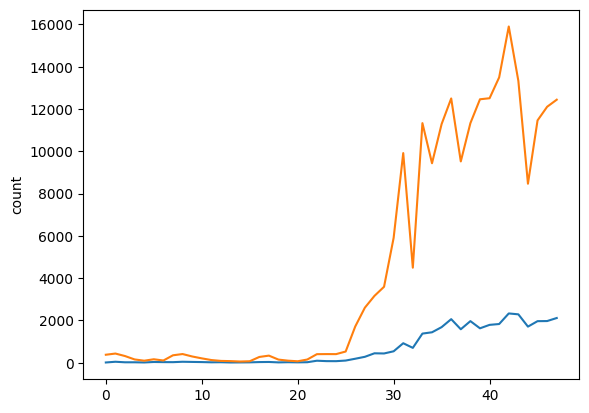

In [10]:
# TODO beautify the plot!
# plot both!
fig, ax = plt.subplots()
ax = sns.lineplot(x=range(len(authors_10_monthly)), y=authors_10_monthly['count'])
ax = sns.lineplot(x=range(len(new_authors_monthly)), y=new_authors_monthly['count'])

Now, let's see how many of 1 note authors or 10+ notes authors have gone dormant for 3 months or longer.

In [8]:
# check if authors were inactive for 3 months after their first note
# part of code was suggested by Gemini

#number of months for inactivity
n = 3
# import notes
notes = pd.read_parquet('notes.parquet', engine='auto')
notes['createdAt'] = pd.to_datetime(notes['createdAt'])

# Find the first note date for each author
first_note = notes.groupby('noteAuthorParticipantId')['createdAt'].min().reset_index()
first_note.rename(columns={'createdAt': 'first_note_date'}, inplace=True)

# Merge the first note dates back into the original DataFrame
df = pd.merge(notes, first_note, on='noteAuthorParticipantId')

# Calculate the date 4 months after the first note
df['four_months_after_first'] = df['first_note_date'] + pd.DateOffset(months=n)

# Filter for notes within 4 months
df['note_within_4_months'] = (df['createdAt'] > df['first_note_date']) & \
    (df['createdAt'] <= df['four_months_after_first'])

# Aggregate to determine if any note was made in the 4 months
df = df.groupby('noteAuthorParticipantId')['note_within_4_months'].any().reset_index()


# merge author list with first note df
first_note = pd.merge(first_note, df, on='noteAuthorParticipantId')
# remove authors who joined after end of 2024
first_note = first_note[first_note['first_note_date'] < pd.Timestamp(2025, 1, 1)]
# now count monthly
df_monthly = first_note.set_index('first_note_date').resample('MS').count()
df_monthly['written_again'] = first_note.groupby(pd.Grouper(key='first_note_date', freq='MS'))\
    ['note_within_4_months'].sum()
df_monthly['not_written_again'] = df_monthly['note_within_4_months'] - df_monthly['written_again']
df_monthly.reset_index(inplace=True)
df_monthly.drop('noteAuthorParticipantId', axis=1, inplace=True)
df_monthly.rename(columns={'note_within_4_months': 'count_author'}, inplace=True)

Text(0, 0.5, 'count authors')

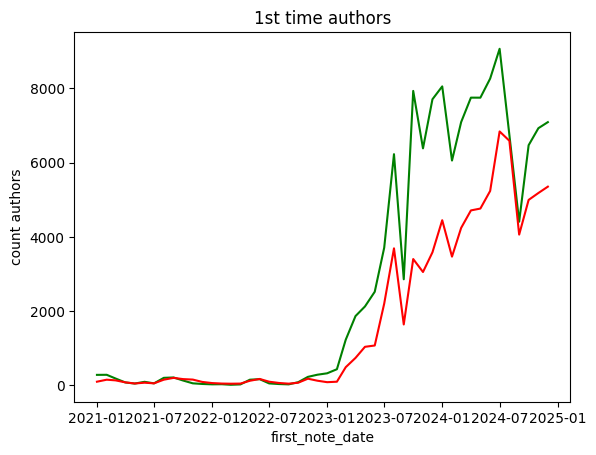

In [5]:
# plot 
ax = plt.subplot()
ax = sns.lineplot(x='first_note_date', y='written_again', data=df_monthly, color='green')
sns.lineplot(x='first_note_date', y='not_written_again', data=df_monthly, color='red')
ax.set_title('1st time authors')
ax.set_ylabel('count authors')

In [29]:
# keep notes written by 10+ authors and remove the first 9 notes
notes_10_plus = notes.groupby('noteAuthorParticipantId')\
    .filter(lambda group: len(group) >= 10, dropna=True)\
    .groupby('noteAuthorParticipantId').apply(lambda group: group.iloc[9:])\
    .reset_index(drop=True)

# notes_10_plus.reset_index(inplace=True)

notes_10_plus['createdAt'] = pd.to_datetime(notes_10_plus['createdAt'])

# Sort the DataFrame within each author's notes
notes_10_plus = notes_10_plus.sort_values(['noteAuthorParticipantId', 'createdAt']).reset_index(drop=True)

# Create a 'next_note' column for the next note date
notes_10_plus['next_note'] = notes_10_plus.groupby('noteAuthorParticipantId')['createdAt'].shift(-1)

last_datapoint_date = notes['createdAt'].max()
# since the last note of each author does not have a next note, I added the date of the last note in the dataset to all NaT
notes_10_plus['next_note'] = notes_10_plus['next_note']\
    .apply(lambda x: last_datapoint_date if pd.isnull(x) else x)

# Calculate the time difference in days
notes_10_plus['time_difference'] = (notes_10_plus['next_note'] - notes_10_plus['createdAt']).dt.days

# Calculate the time difference in months (using 30 days as an average)
notes_10_plus['time_difference_months'] = notes_10_plus['time_difference'] / 30

# now limit dataframe to the end of 2024
notes_10_plus = notes_10_plus[notes_10_plus['createdAt'] < pd.Timestamp(2025, 1, 1)]


/tmp/ipykernel_11725/3587682052.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .groupby('noteAuthorParticipantId').apply(lambda group: group.iloc[9:])\


Now we could think of multiple approaches. 1st is to count when each author was inactive for 4 months or longer. This could result to counting 1 individual multiple times. 
We could also just count the first occurance of inactivity.
Or, if they are active now, not count them at all. I am not happy with this idea, since if we take 2 authors, one starting in 2022 (A) and the other in 2024 (B). If A was inactive for 4 months in 2023 and then became active we don't count them. Then we have author B who was inactive in the late 2024, but we did not have a chance to look at their activity in 2025, so we count them as inactive.

In [30]:
#number of months for inactivity
n = 3
# flag inactivities
notes_10_plus['inactive'] = notes_10_plus['time_difference_months'] > n

In [31]:
# now count 10+ author (from 10th note) and each inactivity (could count one author multiple times)

#count monthly number of 10+ authors
df_monthly_10 = notes_10_plus.set_index('createdAt').resample('MS')\
    ['noteAuthorParticipantId'].nunique().reset_index()
# groupby author, keep last note, count inactivity per month and set its index equal to df_monthly
last_note_per_month = notes_10_plus\
    .groupby([pd.Grouper(key='createdAt', freq='MS'),'noteAuthorParticipantId']).tail(1)
inactive = last_note_per_month.groupby(pd.Grouper(key='createdAt', freq='MS'))['inactive'].sum()
inactive.index = df_monthly_10.index
df_monthly_10['not_written_again'] = inactive
df_monthly_10['written_again'] = df_monthly_10['noteAuthorParticipantId']\
      - df_monthly_10['not_written_again']
df_monthly_10.rename(columns={'noteAuthorParticipantId': 'count_author'}, inplace=True)

Text(0, 0.5, 'count authors')

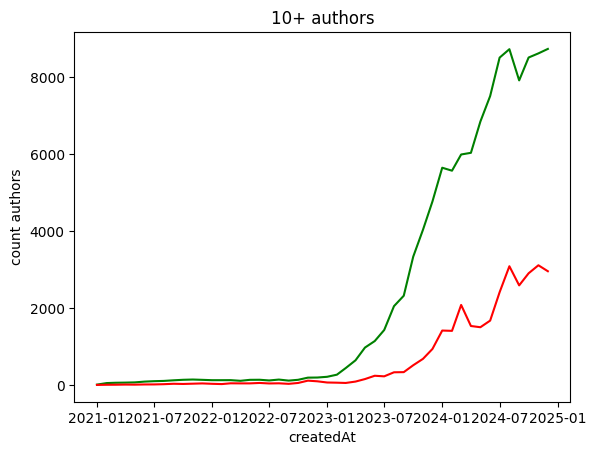

In [32]:
# plot 
ax = plt.subplot()
ax = sns.lineplot(x='createdAt', y='written_again', data=df_monthly_10, color='green')
sns.lineplot(x='createdAt', y='not_written_again', data=df_monthly_10, color='red')
ax.set_title('10+ authors')
ax.set_ylabel('count authors')

<Axes: xlabel='createdAt', ylabel='None'>

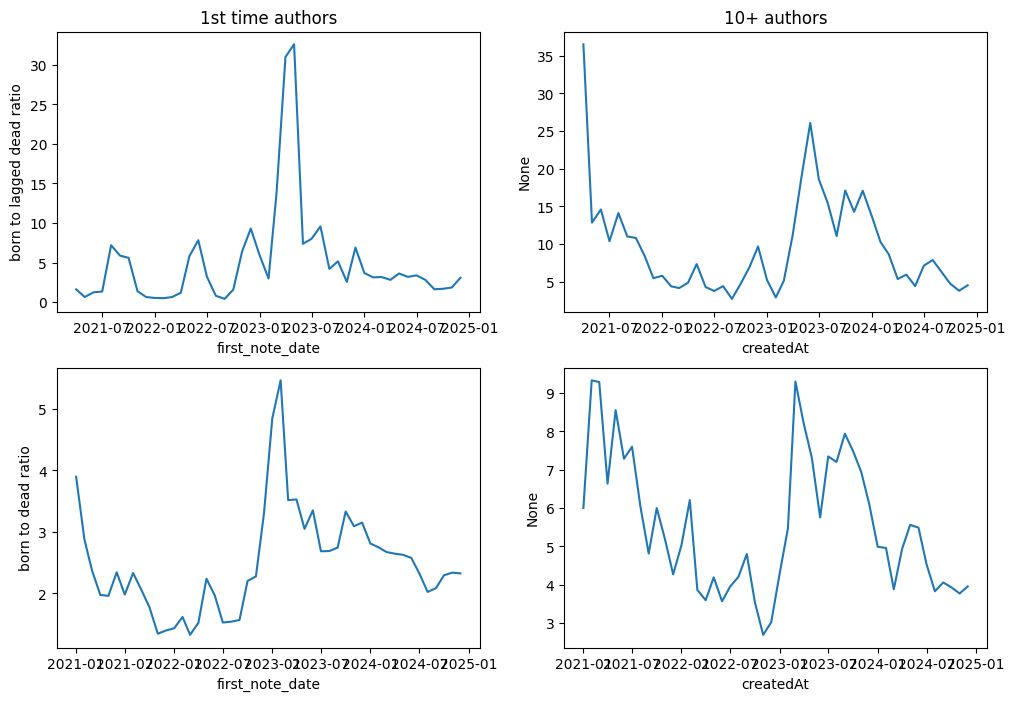

In [34]:
# Let's check born/dead ratio
# dead: someone who hasn't written in the past n months
# born: for 1st time: write their 1st note; for 10+: write their 10th note
# in the 10+ plot, some authors can be dead multiple times, but born once
fig, ax = plt.subplots(2,2, figsize=(12,8))
n = 3
df_monthly['dead'] = df_monthly['not_written_again'].shift(n, fill_value=0)
born_to_dead = df_monthly['count_author'] / df_monthly['dead']

sns.lineplot(x=df_monthly['first_note_date'], y=born_to_dead, ax=ax[0,0])

ax[0,0].set_title('1st time authors')
ax[0,0].set_ylabel('born to lagged dead ratio')
sns.lineplot(x=df_monthly['first_note_date'], 
             y=df_monthly['count_author']/df_monthly['not_written_again'],
             ax=ax[1,0])

ax[1,0].set_ylabel('born to dead ratio')

df_monthly_10['dead'] = df_monthly_10['not_written_again'].shift(n, fill_value=0)
born_to_dead_10 = df_monthly_10['count_author'] / df_monthly_10['dead']

sns.lineplot(x=df_monthly_10['createdAt'], y=born_to_dead_10, ax=ax[0,1])

ax[0,1].set_title('10+ authors')
sns.lineplot(x=df_monthly_10['createdAt'], 
             y=df_monthly_10['count_author']/df_monthly_10['not_written_again'],
             ax=ax[1,1])

In [ ]:
df_monthly['dead'] = df_monthly['not_written_again'].shift(n, fill_value=0)
born_to_dead = df_monthly['count_author'] / df_monthly['dead']
ax = plt.subplot()


In [ ]:
# or if we want to count only 1 inactivity per author
# check if they were inactive in their lifetime, count it once
# as a result the author should also be counted once or should it?
#TODO discuss before moving forward

# notes_10_plus_inactive = notes_10_plus[notes_10_plus['inactive'] == True]
# df_monthly_10_1 = notes_10_plus_inactive.set_index('createdAt').resample('MS')\
#     ['noteAuthorParticipantId'].nunique().reset_index()
# # count inactivity per month and set its index equal to df_monthly
# inactive = notes_10_plus_inactive.groupby(pd.Grouper(key='createdAt', freq='MS'))\
#     ['inactive'].sum()
# inactive.index = df_monthly_10_1.index
# df_monthly_10_1['not_written_again'] = inactive
# df_monthly_10_1['written_again'] = df_monthly_10_1['noteAuthorParticipantId']\
#       - df_monthly_10_1['not_written_again']
# df_monthly_10_1.rename(columns={'noteAuthorParticipantId': 'count_author'}, inplace=True)

In [59]:
df_monthly_10

,createdAt,noteAuthorParticipantId,not_written_again
0,2021-01-01,12,0
1,2021-02-01,56,4
2,2021-03-01,65,5
3,2021-04-01,73,7
4,2021-05-01,77,3
5,2021-06-01,102,11
6,2021-07-01,114,9
7,2021-08-01,127,9
8,2021-09-01,154,19
9,2021-10-01,162,22


### Calculate “lifetime” of authors: gap in time between first and most recent note
-AND number of notes divided by lifetime

In [56]:
# Sort the DataFrame by author and time
df_sorted = notes.sort_values(by=['noteAuthorParticipantId', 'createdAt'])

# Group by 'author' and calculate the time difference between the first and last note
time_diff = df_sorted.groupby('noteAuthorParticipantId').agg(
    first_note_time=('createdAt', 'first'),
    last_note_time=('createdAt', 'last'),
    num_notes=('noteId', 'size')  # Count the number of notes
)

# Calculate the time difference between the first and last note
time_diff['time_diff'] = time_diff['last_note_time'] - time_diff['first_note_time']
time_diff['time_diff'] = time_diff['time_diff'].dt.days / 30  # get lifetime in months

In [57]:
# lifetime distribution
time_diff['time_diff'].describe()

count    213216.000000
mean          3.660944
std           5.209719
min           0.000000
25%           0.000000
50%           1.200000
75%           5.800000
max          47.100000
Name: time_diff, dtype: float64

In [59]:
# if we ignore authors with only one note:
time_diff[time_diff['time_diff'] > 0]['time_diff'].describe()

count    138834.000000
mean          5.622339
std           5.536675
min           0.033333
25%           1.366667
50%           4.100000
75%           8.366667
max          47.100000
Name: time_diff, dtype: float64

In [62]:
# number of notes divided by lifetime 
time_diff_2_plus = time_diff[time_diff['time_diff'] > 0]
time_diff_2_plus['activity'] = time_diff_2_plus['num_notes'] / time_diff_2_plus['time_diff']
time_diff_2_plus['activity'].describe()

/tmp/ipykernel_3408/3612877749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_diff_2_plus['activity'] = time_diff_2_plus['num_notes'] / time_diff_2_plus['time_diff']


count    138834.000000
mean          5.269257
std          18.124019
min           0.044543
25%           0.745342
50%           1.530612
75%           3.719008
max        3802.780749
Name: activity, dtype: float64

### Active users; share of new authors
check if they joined in the past 4 months.
First a monthly view


In [7]:
 #create a df from authors and when they joined
authors = notes.groupby('noteAuthorParticipantId')[['createdAt', 'createdAtYear', 'createdAtMonth']]\
    .first().reset_index()
# sort by date and make it the index, so the search would be easier
authors.sort_values(by='createdAt', inplace=True)
authors.set_index('createdAt', inplace=True)

In [8]:
share_new_authors = dict()
# start from Jan 2024
df = notes[notes.createdAt >= pd.Timestamp(2024, 1, 1)]
df_monthly = df.groupby(['createdAtYear', 'createdAtMonth'])\
    .agg({'noteAuthorParticipantId': 'unique'})
for (year, month), authors_month in df_monthly.iterrows():
    # count new authors
    if_new = 0
    current_month = pd.Timestamp(year, month, 1)
    # create a list of authors joined in the past 4 months; including current month
    authors_new = authors.loc[(current_month - pd.DateOffset(months=4)): (current_month + pd.DateOffset(months=1))]\
        ['noteAuthorParticipantId'].to_list()
    for author in authors_month.values[0]:
        if author in authors_new:
            if_new += 1

    share_new_authors[(year, month)] = if_new / len(authors_month.values[0])
#save share_new_authors
with open('share_new_authors_authors.pkl', 'wb') as f:
    pickle.dump(share_new_authors, f)

KeyboardInterrupt: 

[]

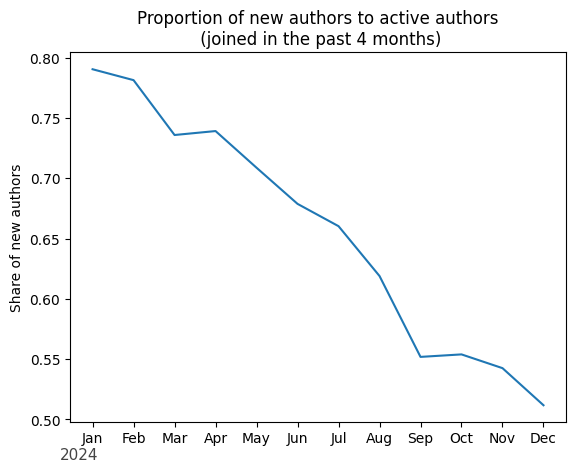

In [ ]:
# load share_new_authors
with open('share_new_authors_authors.pkl', 'rb') as f:
    share_new_authors_month = pickle.load(f)

ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors_month)), y=share_new_authors_month.values())
x_labels = [calendar.month_abbr[month] for (year, month) in share_new_authors_month.keys()]
x_locs = [i for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
# add years
for idx, year in enumerate(range(2024,2025)):
    ax.text(idx*.5 -.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.set_title('Proportion of new authors to active authors\n (joined in the past 4 months)')
plt.plot()

A daily view

In [ ]:
share_new_authors = dict()
# start from Jan 2024
df = notes[notes.createdAt >= pd.Timestamp(2024, 1, 1)]
df['createdAtDay'] = df['createdAt'].dt.day
df_daily = df.groupby(['createdAtYear', 'createdAtMonth','createdAtDay'])\
    .agg({'noteAuthorParticipantId': 'unique'})
for (year, month, day), authors_day in df_daily.iterrows():
    # count new authors
    if_new = 0
    current_date = pd.Timestamp(year, month, day)
    # create a list of authors joined in the past 4 months; including current month
    authors_new = authors.loc[(current_date - pd.DateOffset(months=4)): (current_date + pd.DateOffset(days=1))]\
        ['noteAuthorParticipantId'].to_list()
    for author in authors_day.values[0]:
        if author in authors_new:
            if_new += 1

    share_new_authors[(year, month, day)] = if_new / len(authors_day.values[0])
#save share_new_authors
with open('share_new_authors_authors_daily.pkl', 'wb') as f:
    pickle.dump(share_new_authors, f)

/tmp/ipykernel_2971/644001690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['createdAtDay'] = df['createdAt'].dt.day


[]

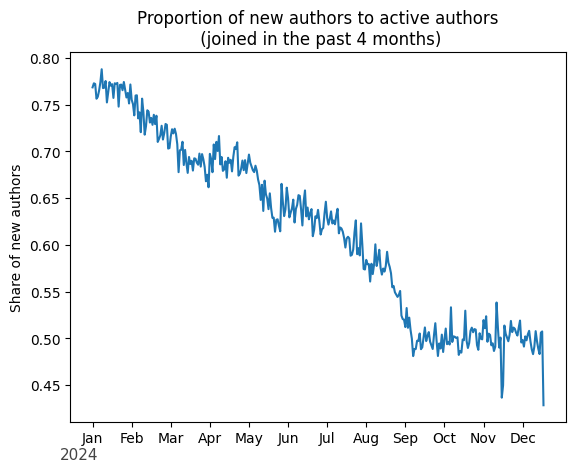

In [ ]:
# load share_new_authors
with open('share_new_authors_authors_daily.pkl', 'rb') as f:
    share_new_authors = pickle.load(f)

ax = plt.subplot()

sns.lineplot(x=range(len(share_new_authors)), y=share_new_authors.values())
x_labels = [calendar.month_abbr[month] for month in range(13)]
x_locs = [(i-1)*30 for i in range(len(x_labels))]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
# add years
for idx, year in enumerate(range(2024,2025)):
    ax.text(idx*.5 -.02, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
# ax.set_xlabel('Time')
ax.set_ylabel('Share of new authors')
ax.set_title('Proportion of new authors to active authors\n (joined in the past 4 months)')
plt.plot()

In [3]:
df = pd.read_parquet('./scored_notes.parquet', engine='auto')

In [4]:
df.columns

Index(['noteId', 'coreNoteIntercept', 'coreNoteFactor1', 'finalRatingStatus',
       'firstTag', 'secondTag', 'coreActiveRules', 'activeFilterTags',
       'classification', 'createdAtMillis', 'coreRatingStatus',
       'metaScorerActiveRules', 'decidedBy', 'expansionNoteIntercept',
       'expansionNoteFactor1', 'expansionRatingStatus',
       'coverageNoteIntercept', 'coverageNoteFactor1', 'coverageRatingStatus',
       'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'numRatings', 'timestampMillisOfCurrentStatus',
       'expansionPlusNoteIntercept', 'expansionPlusNoteFactor1',
       'expansionPlusRatingStatus', 'topicNoteIntercept', 'topicNoteFactor1',
       'topicRatingStatus', 'noteTopic', 'topicNoteConfi

In [3]:
df[df['numRatings'] >=5].loc[:, ['decidedBy','finalRatingStatus', 'numRatings']]

,decidedBy,finalRatingStatus,numRatings
34,ScoringDriftGuard (v1.0),CURRENTLY_RATED_HELPFUL,5
141,ScoringDriftGuard (v1.0),CURRENTLY_RATED_HELPFUL,6
168,CoreModel (v1.1),NEEDS_MORE_RATINGS,10
181,CoreModel (v1.1),NEEDS_MORE_RATINGS,8
183,CoreModel (v1.1),NEEDS_MORE_RATINGS,14
...,...,...,...
1674889,CoreModel (v1.1),NEEDS_MORE_RATINGS,33
1674905,CoreModel (v1.1),NEEDS_MORE_RATINGS,15
1674913,CoreModel (v1.1),NEEDS_MORE_RATINGS,12
1674918,CoreModel (v1.1),NEEDS_MORE_RATINGS,8


In [5]:
# sample from rated and not rated notes
df_sample_rated = df\
    [(df['finalRatingStatus'] != 'NEEDS_MORE_RATINGS')]\
    .sample(n=100, random_state=2025)
df_sample_not_rated = df\
    [(df['finalRatingStatus'] == 'NEEDS_MORE_RATINGS')\
     & (df['numRatings'] >=5)]\
    .sample(n=100, random_state=2025)

df_sample = pd.concat([df_sample_rated, df_sample_not_rated])

In [6]:
df_sample_rated[df_sample_rated['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']\
[['coreNoteIntercept', 'coreNoteFactor1', 'finalRatingStatus',
       'coreRatingStatus','decidedBy', 'expansionNoteIntercept',
       'expansionNoteFactor1', 'expansionRatingStatus',
       'coverageNoteIntercept', 'coverageNoteFactor1', 'coverageRatingStatus',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus', 'expansionPlusNoteIntercept', 'expansionPlusNoteFactor1',
       'expansionPlusRatingStatus',
       'numRatings']]

,coreNoteIntercept,coreNoteFactor1,finalRatingStatus,coreRatingStatus,decidedBy,expansionNoteIntercept,expansionNoteFactor1,expansionRatingStatus,coverageNoteIntercept,coverageNoteFactor1,coverageRatingStatus,groupNoteIntercept,groupNoteFactor1,groupRatingStatus,expansionPlusNoteIntercept,expansionPlusNoteFactor1,expansionPlusRatingStatus,numRatings
1321331,NaN,NaN,CURRENTLY_RATED_HELPFUL,None,ExpansionModel (v1.1),0.443757,0.202811,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,NaN,NaN,None,0.446070,0.205501,CURRENTLY_RATED_HELPFUL,13
902008,0.368484,-0.395131,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS,ScoringDriftGuard (v1.0),0.364179,-0.390135,NEEDS_MORE_RATINGS,0.182059,0.410795,NEEDS_MORE_RATINGS,0.310934,-0.543632,NEEDS_MORE_RATINGS,0.367629,-0.393721,NEEDS_MORE_RATINGS,50
513828,0.431230,0.352343,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,CoreModel (v1.1),0.425772,0.315994,CURRENTLY_RATED_HELPFUL,0.318437,-0.125798,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,0.430852,0.324722,CURRENTLY_RATED_HELPFUL,626
816106,0.186433,0.549042,CURRENTLY_RATED_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),0.183236,0.544482,FIRM_REJECT,0.174732,-0.230830,NEEDS_MORE_RATINGS,0.001111,0.593719,NEEDS_MORE_RATINGS,0.184812,0.546762,NEEDS_MORE_RATINGS,10
290845,0.460647,-0.161905,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,CoreModel (v1.1),0.518125,-0.126731,CURRENTLY_RATED_HELPFUL,0.488126,0.160052,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,0.512706,-0.124412,CURRENTLY_RATED_HELPFUL,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305569,0.344612,0.451399,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS,ScoringDriftGuard (v1.0),0.341030,0.449668,NEEDS_MORE_RATINGS,0.173421,-0.510252,NEEDS_MORE_RATINGS,0.014909,0.744247,NEEDS_MORE_RATINGS,0.346564,0.459112,NEEDS_MORE_RATINGS,309
107681,0.471922,-0.025283,CURRENTLY_RATED_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),0.478391,-0.046072,FIRM_REJECT,0.470124,0.123129,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,0.484175,-0.051855,NEEDS_MORE_RATINGS,24
815055,0.554149,-0.139585,CURRENTLY_RATED_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),0.563915,-0.127527,FIRM_REJECT,0.404572,0.168978,CURRENTLY_RATED_HELPFUL,0.148299,-0.546363,NEEDS_MORE_RATINGS,0.562842,-0.124032,NEEDS_MORE_RATINGS,116
150036,0.549704,-0.077339,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,CoreModel (v1.1),0.561324,-0.043618,CURRENTLY_RATED_HELPFUL,0.344951,0.226181,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,0.567578,-0.046032,CURRENTLY_RATED_HELPFUL,108


check scoring drift guard again

In [23]:
df_sample_rated.loc[1305569]

noteId                                                             1827026955767517586
coreNoteIntercept                                                             0.344612
coreNoteFactor1                                                               0.451399
finalRatingStatus                                              CURRENTLY_RATED_HELPFUL
firstTag                                                       helpfulImportantContext
secondTag                                                                 helpfulClear
coreActiveRules                                                      InitialNMR (v1.0)
activeFilterTags                                                                  None
classification                                   MISINFORMED_OR_POTENTIALLY_MISLEADING
createdAtMillis                                                        1724432145429.0
coreRatingStatus                                                    NEEDS_MORE_RATINGS
metaScorerActiveRules                MetaIn

In [ ]:
# drop unwanted columns
df_sample = df_sample[['coreNoteIntercept', 'coreNoteFactor1', 'finalRatingStatus',
       'coreRatingStatus','decidedBy', 'expansionNoteIntercept',
       'expansionNoteFactor1', 'expansionRatingStatus',
       'coverageNoteIntercept', 'coverageNoteFactor1', 'coverageRatingStatus',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'modelingGroup',
       'numRatings']]
df_sample

,coreNoteIntercept,coreNoteFactor1,finalRatingStatus,coreRatingStatus,decidedBy,expansionNoteIntercept,expansionNoteFactor1,expansionRatingStatus,coverageNoteIntercept,coverageNoteFactor1,coverageRatingStatus,groupNoteIntercept,groupNoteFactor1,groupRatingStatus,groupNoteInterceptMax,groupNoteInterceptMin,modelingGroup,numRatings
1321331,NaN,NaN,CURRENTLY_RATED_HELPFUL,None,ExpansionModel (v1.1),0.443757,0.202811,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,13
902008,0.368484,-0.395131,CURRENTLY_RATED_HELPFUL,NEEDS_MORE_RATINGS,ScoringDriftGuard (v1.0),0.364179,-0.390135,NEEDS_MORE_RATINGS,0.182059,0.410795,NEEDS_MORE_RATINGS,0.310934,-0.543632,NEEDS_MORE_RATINGS,NaN,NaN,6.0,50
513828,0.431230,0.352343,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,CoreModel (v1.1),0.425772,0.315994,CURRENTLY_RATED_HELPFUL,0.318437,-0.125798,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,NaN,NaN,NaN,626
832940,-0.214541,-0.210961,CURRENTLY_RATED_NOT_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),-0.204186,-0.250878,FIRM_REJECT,-0.453942,0.600861,NEEDS_MORE_RATINGS,NaN,NaN,None,NaN,NaN,NaN,6
816106,0.186433,0.549042,CURRENTLY_RATED_HELPFUL,FIRM_REJECT,ScoringDriftGuard (v1.0),0.183236,0.544482,FIRM_REJECT,0.174732,-0.230830,NEEDS_MORE_RATINGS,0.001111,0.593719,NEEDS_MORE_RATINGS,NaN,NaN,14.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584125,NaN,NaN,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),0.408756,-0.082016,CURRENTLY_RATED_HELPFUL,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,6
205405,0.331449,-0.016088,NEEDS_MORE_RATINGS,FIRM_REJECT,CoreModel (v1.1),0.307252,-0.064598,FIRM_REJECT,0.000096,0.210958,NEEDS_MORE_RATINGS,0.228290,-0.049754,CURRENTLY_RATED_HELPFUL,NaN,NaN,14.0,71
1095209,0.077417,-0.839710,NEEDS_MORE_RATINGS,FIRM_REJECT,CoreModel (v1.1),0.063088,-0.840747,FIRM_REJECT,-0.243690,0.699560,NEEDS_MORE_RATINGS,0.130991,-0.817084,NEEDS_MORE_RATINGS,NaN,NaN,3.0,62
75097,0.067604,0.632537,NEEDS_MORE_RATINGS,FIRM_REJECT,CoreModel (v1.1),0.048763,0.622989,FIRM_REJECT,-0.057299,-0.762147,NEEDS_MORE_RATINGS,NaN,NaN,None,NaN,NaN,NaN,11


In [14]:
df_sample[df_sample['multiGroupNumFinalRoundRatings'].notnull()]

,noteId,coreNoteIntercept,coreNoteFactor1,finalRatingStatus,firstTag,secondTag,coreActiveRules,activeFilterTags,classification,createdAtMillis,...,expansionPlusNumFinalRoundRatings,groupNumFinalRoundRatings,topicNumFinalRoundRatings,rescoringActiveRules,multiGroupNoteIntercept,multiGroupNoteFactor1,multiGroupRatingStatus,modelingMultiGroup,multiGroupActiveRules,multiGroupNumFinalRoundRatings
1356917,1833102736348369354,NaN,NaN,CURRENTLY_RATED_HELPFUL,helpfulGoodSources,helpfulClear,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.725881e+12,...,13.0,12.0,NaN,ALL_NOTES,0.226598,0.528370,NEEDS_MORE_RATINGS,1.0,InitialNMR (v1.0),12.0
300066,1712583143788560460,NaN,NaN,CURRENTLY_RATED_HELPFUL,helpfulGoodSources,helpfulClear,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.697147e+12,...,30.0,24.0,NaN,ALL_NOTES,0.470051,-0.176647,CURRENTLY_RATED_HELPFUL,1.0,"InitialNMR (v1.0),GeneralCRH (v1.0)",25.0
459742,1735777237159317950,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.702677e+12,...,25.0,23.0,NaN,ALL_NOTES,0.219462,0.606440,NEEDS_MORE_RATINGS,1.0,InitialNMR (v1.0),24.0
1352513,1832517150784848110,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.725741e+12,...,6.0,6.0,NaN,ALL_NOTES,0.139823,-0.441599,NEEDS_MORE_RATINGS,1.0,"InitialNMR (v1.0),FilterLowDiligence (v1.0)",6.0
501882,1741153647436657087,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.703958e+12,...,14.0,NaN,NaN,ALL_NOTES,0.151716,-0.724121,NEEDS_MORE_RATINGS,1.0,InitialNMR (v1.0),12.0
1537239,1853067239852826841,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,MISINFORMED_OR_POTENTIALLY_MISLEADING,1.730641e+12,...,25.0,NaN,15.0,ALL_NOTES,-0.057151,-0.461219,NEEDS_MORE_RATINGS,1.0,"InitialNMR (v1.0),FilterLowDiligence (v1.0)",22.0
400265,1728115119823937646,NaN,NaN,NEEDS_MORE_RATINGS,None,None,None,None,None,1.700850e+12,...,24.0,NaN,NaN,ALL_NOTES,0.229809,0.499899,NEEDS_MORE_RATINGS,1.0,InitialNMR (v1.0),21.0


### Fraction of quality authors joined in the previous quarter
Quality author means someone who will write at least one helpful note

In [ ]:
# Find the first note written by each author, and if that author goes on to write another note
first_notes = notes_and_status.groupby('noteAuthorParticipantId')\
    [['createdAt']]\
    .first().reset_index()
# Restricting our analysis to authors who joined in after 2023, before 2025 
first_notes = first_notes[(first_notes.createdAt >= pd.Timestamp(2023, 1, 1)) &
                          (first_notes.createdAt < pd.Timestamp(2025, 1, 1))]
# check if they have written at least one helpful note
helpful_authors = notes_and_status.groupby('noteAuthorParticipantId')\
    .apply(lambda group: (group['currentStatus']=='CURRENTLY_RATED_HELPFUL').any())\
    .reset_index()
# rename if_helpful column
helpful_authors.rename(columns={0: 'if_helpful'}, inplace=True)
# merge to add a column regarding helpfulness
first_notes = pd.merge(first_notes, helpful_authors, on='noteAuthorParticipantId')
# set index for monthly sampling
first_notes.set_index('createdAt', inplace=True)

# count helpful authors per month
df1 = first_notes.resample('MS')['if_helpful'].sum().reset_index()
# count total authors joined per month
df2= first_notes.resample('MS')['if_helpful'].count().reset_index()
df2.rename(columns={'if_helpful': 'count'}, inplace=True)
# merge dfs
df = pd.merge(df1, df2, on='createdAt')
df['fraction_helpful'] = df['if_helpful'] / df['count']

KeyboardInterrupt: 

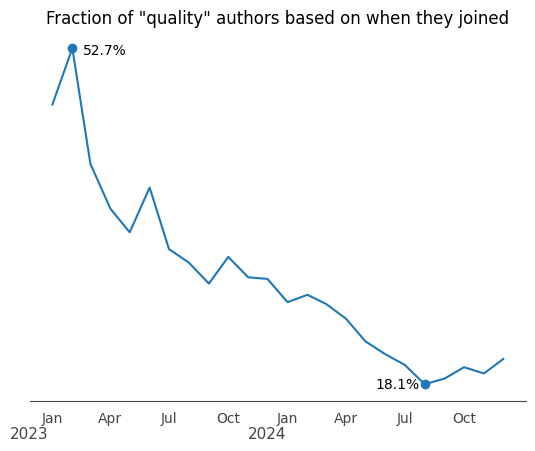

In [ ]:
ax = plt.subplot()
# plot fraction of helpful authors
ax = sns.lineplot(x='createdAt', y='fraction_helpful', data=df)

x_labels = [calendar.month_abbr[int(date.get_text()[-2:])] for date in ax.get_xticklabels()]
x_locs = ax.get_xticks()

ax.set_xticks(x_locs[:-1])
ax.set_xticklabels(x_labels[:-1])

# add years
ax.text(-.04, -.1, 2023, size=11, color='#444', transform=ax.transAxes)
ax.text(.44, -.1, 2024, size=11, color='#444', transform=ax.transAxes)

# find max, min and their indices
max_fraction, idx_max_fraction = df['fraction_helpful'].max(), df['fraction_helpful'].idxmax()
min_fraction, idx_min_fraction = df['fraction_helpful'].min(), df['fraction_helpful'].idxmin()
# add text and circle to max and min
ax.plot(df['createdAt'][idx_max_fraction],
        max_fraction,
        marker='o',
        color='tab:blue')
ax.text(idx_max_fraction/len(df)+.11,
        .94,
        f"{max_fraction*100:.1f}%",
        ha='center', 
        transform=ax.transAxes)
ax.plot(df['createdAt'][idx_min_fraction],
        min_fraction,
        marker='o',
        color='tab:blue')
ax.text(idx_min_fraction/len(df) -.05,
        .035,
        f"{min_fraction*100:.1f}%",
        ha='center', 
        transform=ax.transAxes)
ax.set_title('Fraction of "quality" authors based on when they joined')
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='both', colors="#444444", labelleft=False, left=False, bottom=False)
ax.spines[['bottom']].set_color("grey")
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#444444')
ax.tick_params(axis='both', colors='#444444')

plt.savefig('plots/fraction_quality_authors.png')
plt.show()

### Top X% of authors wrote Y% of notes in 2024

I just limited the data to 2024. So if someone had written loads of notes in other years, but only 1 in 2024, just 1 was counted.

In [85]:
notes.columns

Index(['noteId', 'noteAuthorParticipantId', 'createdAtMillis', 'tweetId',
       'classification', 'believable', 'harmful', 'validationDifficulty',
       'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'createdAt', 'createdAtYear', 'createdAtMonth'],
      dtype='object')

In [4]:
notes_24 = notes[(notes.createdAt >= pd.Timestamp(2024, 1, 1)) &
                 (notes.createdAt < pd.Timestamp(2025, 1, 1))]
df = notes_24.groupby('noteAuthorParticipantId')['noteId']\
    .count().sort_values(ascending=False).reset_index()
df.rename(columns={'noteId': 'note_count'}, inplace=True)

You can fill X to find Y

In [63]:
# what percentage of authors you want to look at
X = 1
print(f"Top {X}% authors wrote\
 {df.loc[:round(len(df)*X/100)]['note_count'].sum() / len(notes_24) *100:.0f}% of notes")


Top 1% authors wrote 27% of notes


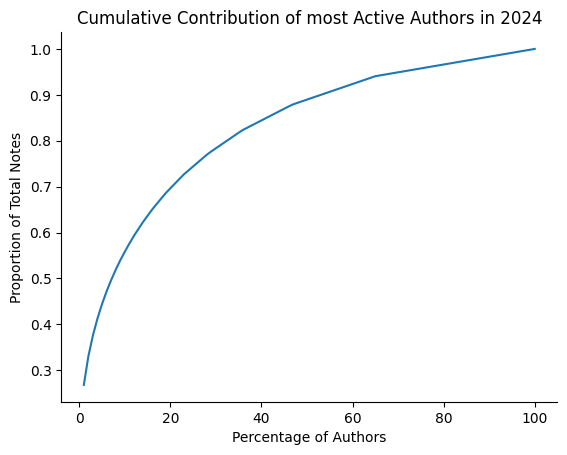

In [6]:
# make a plot of cumulative percentages
contributions = dict()
for author_percent in range(1,101):
    contributions[author_percent] = df.loc[:round(len(df)*author_percent/100)]['note_count'].sum()\
          / len(notes_24)

ax = sns.lineplot(x=range(1,101), y=contributions.values())
ax.set_title('Cumulative Contribution of most Active Authors in 2024')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Percentage of Authors')
ax.set_ylabel('Proportion of Total Notes')
plt.show()

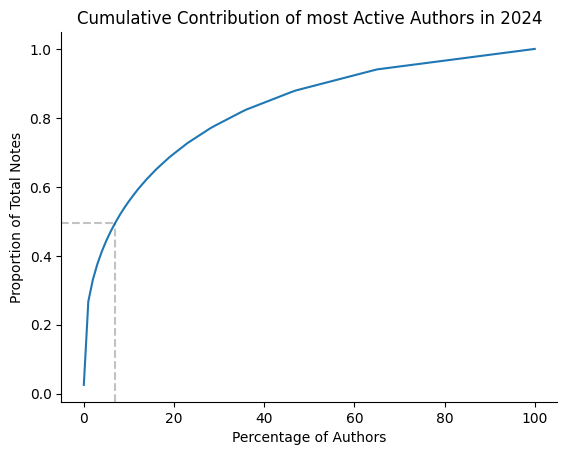

In [ ]:
# extend y axis to zero by including 0 in x axis
# make a plot of cumulative percentages
contributions = dict()
for author_percent in range(101):
    contributions[author_percent] = df.loc[:round(len(df)*author_percent/100)]['note_count'].sum()\
          / len(notes_24)

ax = sns.lineplot(x=range(101), y=contributions.values())
ax.set_title('Cumulative Contribution of most Active Authors in 2024')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Percentage of Authors')
ax.set_ylabel('Proportion of Total Notes')
# save xlims
xrange = ax.get_xlim()
yrange = ax.get_ylim()
# add 50% contribution line
c = .5
x, y = min(contributions.items(), key=lambda x: abs(c - x[1]))
# add dashed line for the x and y
ax.hlines(y=y, xmin=xrange[0], xmax=x, ls='--', color="#44444452")
ax.vlines(x=x, ymin=yrange[0], ymax=y, ls='--', color="#44444452")
ax.set_xlim(xrange)
ax.set_ylim(yrange)
plt.show()

Contributions for published notes:

Text(0, 0.5, 'Proportion of Total Helpful Notes')

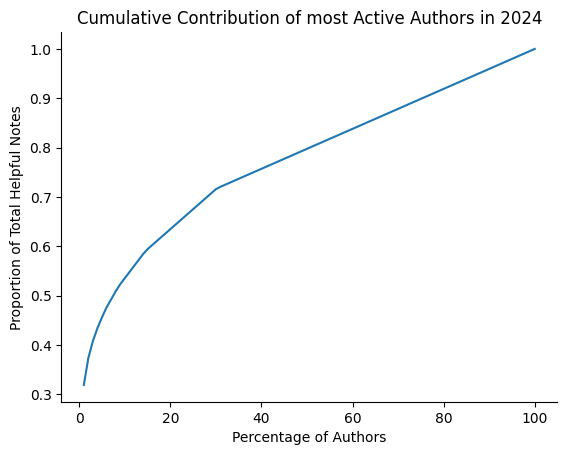

In [28]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated_2024 = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1)) &
                    (rated.createdAt < pd.Timestamp(2025, 1, 1))]
rated_2024_pub = rated_2024[rated_2024['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']
df = rated_2024_pub.groupby('noteAuthorParticipantId')['noteId']\
    .count().sort_values(ascending=False).reset_index()
df.rename(columns={'noteId': 'note_count'}, inplace=True)

# make a plot of cumulative percentages
contributions = dict()
for author_percent in range(1,101):
    contributions[author_percent] = df.loc[:round(len(df)*author_percent/100)]['note_count'].sum()\
          / len(rated_2024_pub)

ax = sns.lineplot(x=range(1,101), y=contributions.values())
ax.set_title('Cumulative Contribution of most Active Authors in 2024')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Percentage of Authors')
ax.set_ylabel('Proportion of Total Helpful Notes')

In [35]:
# what percentage of authors you want to look at
X = 3
print(f"Top {X}% authors wrote\
 {df.loc[:round(len(df)*X/100)]['note_count'].sum() / len(rated_2024_pub) *100:.0f}% of Helpful notes")

Top 3% authors wrote 41% of Helpful notes


In [116]:
# track what pecentage of authors wrote 50% of notes over time
# a rolling window of one year
date_range = pd.date_range(start='1/1/2022', end='1/1/2025', freq='QE')
fraction_notes = .5
fraction_authros = dict()
for date in date_range:
    df = notes[(notes.createdAt <= date) &
               (notes.createdAt >= date - pd.DateOffset(years=1))]
    df_cum = df.groupby('noteAuthorParticipantId')['noteId'].count()\
        .sort_values(ascending=False).cumsum().reset_index()
    num_authors = df_cum[abs(df_cum.noteId-len(df)*fraction_notes) == min(abs(df_cum.noteId-len(df)*fraction_notes))]\
        .index.values[0]
    percentage = num_authors / len(df_cum) * 100
    fraction_authros[date] = percentage
    

In [115]:
num_authors[0]

np.int64(13268)

Text(0.5, 1.0, 'Fraction of authors who wrote 50% of notes in the past year')

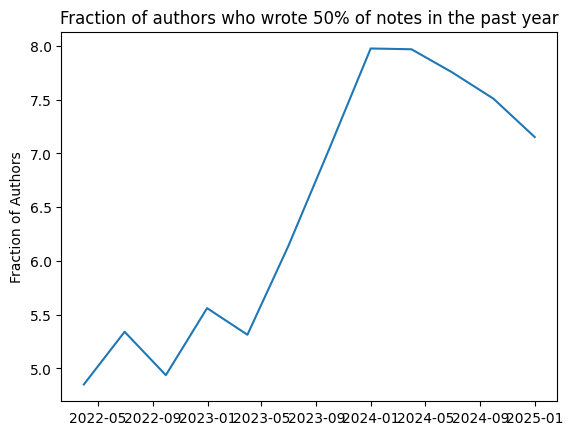

In [121]:
# plot
fig, ax = plt.subplots()
ax = sns.lineplot(x=fraction_authros.keys(), y=fraction_authros.values())
ax.set_ylabel('Fraction of Authors')
ax.set_title('Fraction of authors who wrote 50% of notes in the past year')

In [104]:
fraction_authros.values()

dict_values([Index([4.84996510816469], dtype='float64'), Index([5.340250228867867], dtype='float64'), Index([4.936667749269243], dtype='float64'), Index([5.560165975103734], dtype='float64'), Index([5.312868949232586], dtype='float64'), Index([6.135387551980367], dtype='float64'), Index([7.046716474316114], dtype='float64'), Index([7.976357321308878], dtype='float64'), Index([7.969018408025939], dtype='float64'), Index([7.753684478409592], dtype='float64'), Index([7.508934821856232], dtype='float64'), Index([7.152175084901083], dtype='float64')])

In [99]:
fraction_authros.keys()[0].quarter()

TypeError: 'dict_keys' object is not subscriptable

In [68]:
df = df.groupby('noteAuthorParticipantId')['noteId'].count().sort_values(ascending=False).cumsum().reset_index()

### fraction of helpful notes among all authors and active ones

In [49]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated_2024 = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1)) &
                    (rated.createdAt < pd.Timestamp(2025, 1, 1))]
rated_2024_pub = rated_2024[rated_2024['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']

In [50]:
f'{len(rated_2024_pub) / len(rated_2024) * 100 :.0f}% of all notes were published in 2024.'

'8% of all notes were published in 2024.'

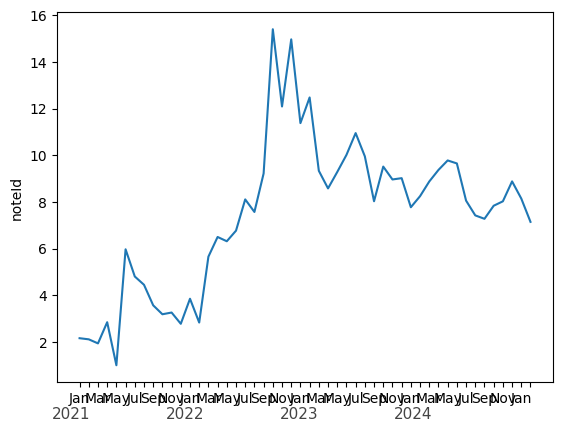

In [72]:
# and a plot of monthly view of share of helpful notes
rated_pub_monthly = rated[rated['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count().reset_index()

rated_monthly = rated.groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count().reset_index()
fraction_helpful_monthly = rated_pub_monthly['noteId'] / rated_monthly['noteId'] * 100
ax = sns.lineplot(x= range(len(fraction_helpful_monthly)), y=fraction_helpful_monthly)
x_labels = [calendar.month_abbr[month] for month in rated_monthly['createdAtMonth'].astype(int)]
x_locs = [i for i in range(len(x_labels))]

ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
# add years
for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.23 -.01, -.1, str(year), size=11, color='#444', transform=ax.transAxes)

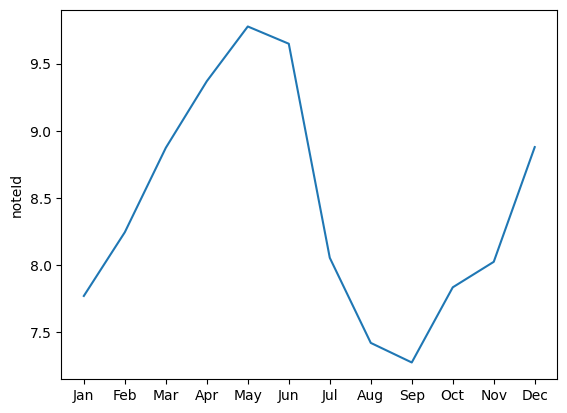

In [56]:
# and a plot of monthly view of share of helpful notes in 2024
rated_pub_monthly = rated_2024_pub\
    .groupby(['createdAtMonth'])['noteId'].count().reset_index()

rated_monthly = rated_2024.groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count().reset_index()
fraction_helpful_monthly = rated_pub_monthly['noteId'] / rated_monthly['noteId'] * 100
ax = sns.lineplot(x= range(len(fraction_helpful_monthly)), y=fraction_helpful_monthly)
x_labels = [calendar.month_abbr[month] for month in rated_monthly['createdAtMonth'].astype(int)]
x_locs = [i for i in range(len(x_labels))]

ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)
# for label in ax.xaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
# add years
# for idx, year in enumerate(range(2021,2025)):
#     ax.text(idx*.23 -.01, -.1, str(year), size=11, color='#444', transform=ax.transAxes)
plt.show()

[]

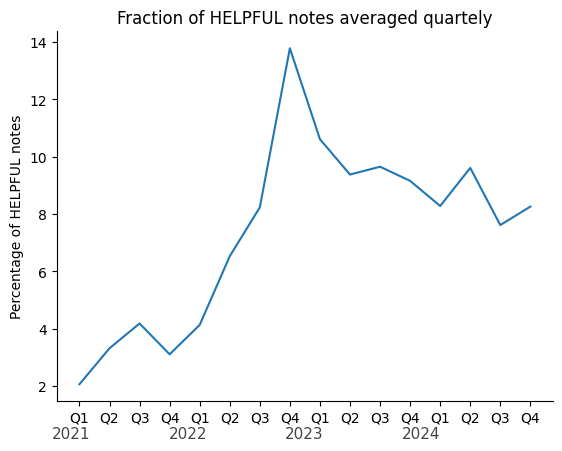

In [84]:
# aggregate data quarterly
rated = rated[rated.createdAt < pd.Timestamp(2025, 1, 1)]
rated_pub = rated[rated['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']
rated_pub_q = rated_pub\
    .groupby(pd.PeriodIndex(rated_pub.createdAt, freq='Q'))['noteId'].count().reset_index()

rated_q = rated.groupby(pd.PeriodIndex(rated.createdAt, freq='Q'))['noteId'].count().reset_index()
fraction_helpful_q = rated_pub_q['noteId'] / rated_q['noteId'] * 100

ax = sns.lineplot(x= range(len(fraction_helpful_q)), y=fraction_helpful_q)
x_labels = ['Q' + str(q.quarter) for q in rated_q.createdAt]
x_locs = [i for i in range(len(x_labels))]

ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels)

for idx, year in enumerate(range(2021,2025)):
    ax.text(idx*.235 -.01, -.1, str(year), size=11, color='#444', transform=ax.transAxes)

ax.set_ylabel('Percentage of HELPFUL notes')
ax.set_title('Fraction of HELPFUL notes averaged quartely')
ax.spines[['top', 'right']].set_visible(False)
plt.plot()


In [93]:
# find top authors
df_without_rating = rated_2024.groupby(['noteAuthorParticipantId'])['noteId']\
    .count().sort_values(ascending=False).reset_index()
df_without_rating.rename(columns={'noteId': 'note_count'}, inplace=True)
top_1_percent = df_without_rating['noteAuthorParticipantId']\
    .loc[:round(len(df_without_rating)*1/100)].to_list()
count_notes_top_1 = df_without_rating['note_count'].sum()


In [94]:
# find fraction of published notes among top authors
df_with_rating = rated_2024.groupby(['noteAuthorParticipantId', 'finalRatingStatus'])['noteId']\
    .count().reset_index()
df_with_rating.rename(columns={'noteId': 'note_count'}, inplace=True)
count_published_top_1 = 0
for author in top_1_percent:
    count_published_top_1 += df_with_rating\
        [(df_with_rating['noteAuthorParticipantId'] == author) &
        (df_with_rating['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL')]\
            .sum().values[-1]

f'{count_published_top_1 / count_notes_top_1 * 100 :.0f}% of notes from top 1% authors were published in 2024.'

'3% of notes from top 1% authors were published in 2024.'

That's odd! We thought publishing was an incentive to write more notes. Now that I think about it, for automaticly generated notes, publishing would not matter that much. We need to look at people with high rate of note writing, but not automated ones!

In [95]:
#TODO
# look at middle authors, just remove the ones who have written thousands of notes!

### Q. What percentage of authors who have at least one note in the first half of 2024, have written a note on the second half? How were they in terms of helpfullness?

In [22]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated_2024 = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1)) &
                    (rated.createdAt < pd.Timestamp(2025, 1, 1))]

In [4]:
rated.columns

Index(['noteId', 'finalRatingStatus', 'createdAtMillis', 'createdAt',
       'createdAtYear', 'createdAtMonth', 'numRatings',
       'noteAuthorParticipantId', 'tweetId', 'firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus', 'lockedStatus',
       'coreNoteIntercept', 'coreNoteFactor1', 'coreRatingStatus', 'decidedBy',
       'expansionNoteIntercept', 'expansionNoteFactor1',
       'expansionRatingStatus', 'coverageNoteIntercept', 'coverageNoteFactor1',
       'coverageRatingStatus', 'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'summary', 'isMediaNote'],
      dtype='object')

In [38]:
first_half = rated_2024[rated_2024.createdAt <= pd.Timestamp(2024, 6, 30)]
second_half = rated_2024[rated_2024.createdAt > pd.Timestamp(2024, 6, 30)]
first_half_authors = first_half.groupby(['noteAuthorParticipantId', 'finalRatingStatus'])['noteId']\
    .count().reset_index()
second_half_authors = second_half.groupby(['noteAuthorParticipantId'])['noteId']\
    .count().reset_index()

In [34]:
first_half_authors_1_helpful = first_half_authors\
    [first_half_authors['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL']\
    ['noteAuthorParticipantId'].unique()

first_half_authors_no_helpful = [author for author in first_half_authors['noteAuthorParticipantId'].unique()\
                                 if author not in first_half_authors_1_helpful]

In [52]:
first_half_authors_1_helpful_wrote_again = list(set(first_half_authors_1_helpful) & 
                                                set(second_half_authors['noteAuthorParticipantId']))
first_half_authors_not_helpful_wrote_again = list(set(first_half_authors_no_helpful) & 
                                                set(second_half_authors['noteAuthorParticipantId']))

In [ ]:
f'{len(first_half_authors_1_helpful_wrote_again) / len(first_half_authors_1_helpful)*100:.0f}%\
 of authors who have written at least 1 helpful note in the first half of 2024, wrote again in the\
 second half of 2024. Whereas \
{len(first_half_authors_not_helpful_wrote_again) / len(first_half_authors_no_helpful)*100:.0f}% \
of authors who had no helpful note, wrote in the 2nd half of 2024.'

'68% of authors who have written at list 1 helfpul note in the first half of 2024, wrote again in the second half of 2024. Whereas 49% of authors who had no helfpul note, wrote in the 2nd half of 2024.'

Now check the same fraction, for authors who have received at least one notification about their note becoming helpful.

In [47]:
first_half = rated_2024[rated_2024.createdAt <= pd.Timestamp(2024, 6, 30)]
second_half = rated_2024[rated_2024.createdAt > pd.Timestamp(2024, 6, 30)]
first_half_authors = first_half.groupby(['noteAuthorParticipantId', 'finalRatingStatus','firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus'])['noteId']\
    .count().reset_index()
second_half_authors = second_half.groupby(['noteAuthorParticipantId'])['noteId']\
    .count().reset_index()



In [52]:
first_half_authors_1_helpful = first_half_authors\
    [(first_half_authors['finalRatingStatus'] == 'CURRENTLY_RATED_HELPFUL') |
     (first_half_authors['firstNonNMRStatus'] == 'CURRENTLY_RATED_HELPFUL') |
     (first_half_authors['mostRecentNonNMRStatus'] == 'CURRENTLY_RATED_HELPFUL')]\
    ['noteAuthorParticipantId'].unique()

first_half_authors_no_helpful = [author for author in first_half_authors['noteAuthorParticipantId'].unique()\
                                 if author not in first_half_authors_1_helpful]

In [61]:
first_half_authors_1_helpful_wrote_again = list(set(first_half_authors_1_helpful) & 
                                                set(second_half_authors['noteAuthorParticipantId']))
first_half_authors_not_helpful_wrote_again = list(set(first_half_authors_no_helpful) & 
                                                set(second_half_authors['noteAuthorParticipantId']))

In [ ]:
f'{len(first_half_authors_1_helpful_wrote_again) / len(first_half_authors_1_helpful)*100:.0f}%\
 of authors who have at at least once been helpful in the first half of 2024, wrote again in the\
 second half of 2024. Whereas \
{len(first_half_authors_not_helpful_wrote_again) / len(first_half_authors_no_helpful)*100:.0f}% \
of authors who had no helpful note, wrote in the 2nd half of 2024.'

'66% of authors who have written at list 1 helfpul note in the first half of 2024, wrote again in the second half of 2024. Whereas 42% of authors who had no helfpul note, wrote in the 2nd half of 2024.'

In [11]:
rated_2024[['decidedBy', 'finalRatingStatus']].value_counts()

decidedBy                        finalRatingStatus          
CoreModel (v1.1)                 NEEDS_MORE_RATINGS             741100
ExpansionPlusModel (v1.1)        NEEDS_MORE_RATINGS             101560
ExpansionModel (v1.1)            NEEDS_MORE_RATINGS              78089
CoreModel (v1.1)                 CURRENTLY_RATED_HELPFUL         59725
MultiGroupModel01 (v1.0)         NEEDS_MORE_RATINGS              30434
CoreModel (v1.1)                 CURRENTLY_RATED_NOT_HELPFUL     24303
ScoringDriftGuard (v1.0)         CURRENTLY_RATED_HELPFUL         17740
                                 CURRENTLY_RATED_NOT_HELPFUL      8507
ExpansionModel (v1.1)            CURRENTLY_RATED_HELPFUL          8407
ScoringDriftGuard (v1.0)         NEEDS_MORE_RATINGS               6957
NmrDueToMinStableCrhTime (v1.0)  NEEDS_MORE_RATINGS               6821
MultiGroupModel01 (v1.0)         CURRENTLY_RATED_HELPFUL          1943
ExpansionModel (v1.1)            CURRENTLY_RATED_NOT_HELPFUL      1574
GroupModel03 (v1

In [12]:
len(rated_2024)

1093680

### Q. One author (2nd most active author) cannot be linked to an account. Let's find out if their note were helpful

In [38]:
df = rated[rated['noteAuthorParticipantId'] == missing_author]\
    [['noteId', 'tweetId', 'noteAuthorParticipantId', 'summary', 'createdAt', 'finalRatingStatus']]
df.to_csv('missing_author.csv')
df['finalRatingStatus'].value_counts()

finalRatingStatus
NEEDS_MORE_RATINGS             8239
CURRENTLY_RATED_HELPFUL         483
CURRENTLY_RATED_NOT_HELPFUL       2
Name: count, dtype: int64

In [42]:
len(df)

8724

In [26]:
df['createdAt'].max()

Timestamp('2025-02-23 21:17:06.564000')

In [37]:
df[['summary', 'finalRatingStatus']].head(10)

,summary,finalRatingStatus
62798,The Moderna or Pfizer-BioNTech mRNA vaccines h...,NEEDS_MORE_RATINGS
62825,The American Medical Association (AMA) survey ...,NEEDS_MORE_RATINGS
62829,The declaration offers no details on how it w...,NEEDS_MORE_RATINGS
62832,The mRNA from the vaccines does not enter the ...,NEEDS_MORE_RATINGS
62834,The former health secretary discussed when to...,NEEDS_MORE_RATINGS
62836,The study by Schwab didn’t provide evidence sh...,CURRENTLY_RATED_HELPFUL
62851,Randomized controlled trials show ivermectin h...,NEEDS_MORE_RATINGS
62853,"Genevant sublicensed the patents to BioNTech, ...",CURRENTLY_RATED_HELPFUL
62855,Against the backdrop of the Kremlin’s escalati...,NEEDS_MORE_RATINGS
62856,The 2014-2021 Russia’s aggression in Donbas re...,NEEDS_MORE_RATINGS


### Monthly averge of number of ratings per note

In [96]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')

In [97]:
rated.columns

Index(['noteId', 'finalRatingStatus', 'createdAtMillis', 'createdAt',
       'createdAtYear', 'createdAtMonth', 'numRatings',
       'noteAuthorParticipantId', 'tweetId', 'firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus', 'lockedStatus',
       'coreNoteIntercept', 'coreNoteFactor1', 'coreRatingStatus', 'decidedBy',
       'expansionNoteIntercept', 'expansionNoteFactor1',
       'expansionRatingStatus', 'coverageNoteIntercept', 'coverageNoteFactor1',
       'coverageRatingStatus', 'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'summary', 'isMediaNote'],
      dtype='object')

In [101]:
rated_monthly = rated.groupby(['createdAtYear', 'createdAtMonth'])['numRatings'].mean().reset_index()

<Axes: xlabel='createdAtYear', ylabel='numRatings'>

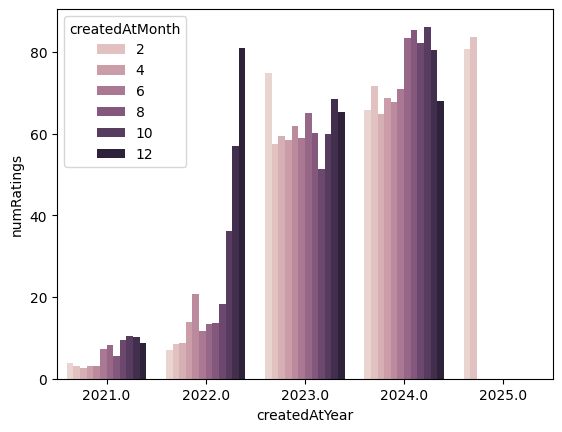

In [103]:
sns.barplot(data=rated_monthly, x='createdAtYear', y='numRatings', hue='createdAtMonth')

Obviously, notes are not short of ratings!

## RDD
Our approach: check helpfulness scores of the first notes from each author in 2024. Check if they have written another note.

In [3]:
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated_2024 = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1)) &
                    (rated.createdAt < pd.Timestamp(2025, 1, 1))]

In [123]:
rated.columns

Index(['noteId', 'finalRatingStatus', 'createdAtMillis', 'createdAt',
       'createdAtYear', 'createdAtMonth', 'numRatings',
       'noteAuthorParticipantId', 'tweetId', 'firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus', 'lockedStatus',
       'coreNoteIntercept', 'coreNoteFactor1', 'coreRatingStatus', 'decidedBy',
       'expansionNoteIntercept', 'expansionNoteFactor1',
       'expansionRatingStatus', 'coverageNoteIntercept', 'coverageNoteFactor1',
       'coverageRatingStatus', 'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'summary', 'isMediaNote'],
      dtype='object')

In [37]:
first_notes = rated_2024.groupby('noteAuthorParticipantId')\
    [['finalRatingStatus', 'numRatings', 'decidedBy','coreNoteIntercept', 'coreNoteInterceptMax']]\
    .first().reset_index()
have_another_note = rated_2024[rated_2024.groupby('noteAuthorParticipantId').cumcount() >= 2]\
    ['noteAuthorParticipantId'].to_list()
first_notes['if_written_again'] = first_notes['noteAuthorParticipantId'].isin(have_another_note)

In [38]:
# just focus on core model for now
first_notes = first_notes[first_notes['decidedBy'] == 'CoreModel (v1.1)']

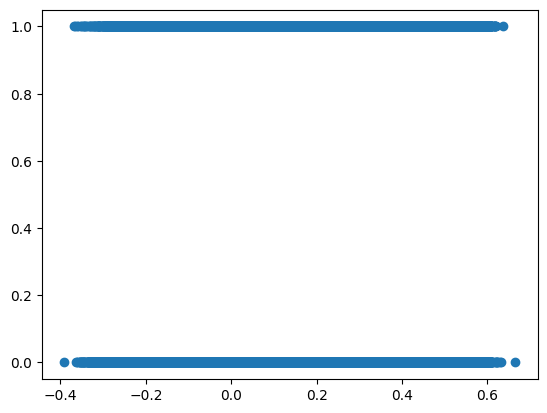

In [128]:
plt.scatter(x=first_notes['coreNoteIntercept'], y=first_notes['if_written_again'])

In [48]:
window = 0.1
df_higher = first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4)]
df_lower = first_notes[(first_notes['coreNoteIntercept'] < .4) &
                         (first_notes['coreNoteIntercept'] > .4 - window)]
# another df including all
df_RDD = first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4 - window)]
df_RDD['group'] = df_RDD['finalRatingStatus'].apply(lambda x: 1 if x == 'CURRENTLY_RATED_HELPFUL' else 0)

/tmp/ipykernel_15596/2275757671.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RDD['group'] = df_RDD['finalRatingStatus'].apply(lambda x: 1 if x == 'CURRENTLY_RATED_HELPFUL' else 0)


In [10]:
(len(first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4 )])) / len(df_window)

0.4697351193473663

In [23]:
df_higher['if_written_again'].mean()

np.float64(0.5340380549682875)

In [24]:
df_lower['if_written_again'].mean()

np.float64(0.4889975550122249)

In [49]:
# fit linear regression
RDD = linear_model.LogisticRegression()
RDD.fit(df_RDD[['group', 'coreNoteIntercept']], df_RDD['if_written_again'])

LogisticRegression()

In [ ]:
RDD.coef_

array([[-0.17647577,  1.5702995 ]])

In [35]:
df_RDD[['finalRatingStatus', 'coreNoteIntercept', 'coreNoteInterceptMax']]

,finalRatingStatus,coreNoteIntercept,coreNoteInterceptMax
13,NEEDS_MORE_RATINGS,0.415720,0.419939
45,NEEDS_MORE_RATINGS,0.384220,0.388377
98,NEEDS_MORE_RATINGS,0.424668,0.451081
165,NEEDS_MORE_RATINGS,0.388664,0.431049
260,NEEDS_MORE_RATINGS,0.395331,0.410247
...,...,...,...
185626,CURRENTLY_RATED_HELPFUL,0.408510,0.437879
185669,NEEDS_MORE_RATINGS,0.406842,0.421612
185685,NEEDS_MORE_RATINGS,0.377074,0.392348
185706,CURRENTLY_RATED_HELPFUL,0.390212,0.488393


Let's check from 2 to 3. If publishing your 2nd note make you more likely to publish your 3rd?

In [ ]:
first_notes = rated_2024.groupby('noteAuthorParticipantId')\
    [['finalRatingStatus', 'numRatings', 'decidedBy','coreNoteIntercept', 'coreNoteInterceptMax']]\
    .first(2).reset_index()
have_another_note = rated_2024[rated_2024.groupby('noteAuthorParticipantId').cumcount() >= 3]\
    ['noteAuthorParticipantId'].to_list()
first_notes['if_written_again'] = first_notes['noteAuthorParticipantId'].isin(have_another_note)
# just focus on core model for now
first_notes = first_notes[first_notes['decidedBy'] == 'CoreModel (v1.1)']
window = 0.1
df_higher = first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4)]
df_lower = first_notes[(first_notes['coreNoteIntercept'] < .4) &
                         (first_notes['coreNoteIntercept'] > .4 - window)]
# another df including all
df_RDD = first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4 - window)]
df_RDD['group'] = df_RDD['finalRatingStatus'].apply(lambda x: 1 if x == 'CURRENTLY_RATED_HELPFUL' else 0)
(len(first_notes[(first_notes['coreNoteIntercept'] < window + .4) &
                         (first_notes['coreNoteIntercept'] > .4 )])) / len(df_window)
df_higher['if_written_again'].mean()
df_lower['if_written_again'].mean()
# fit linear regression
RDD = linear_model.LogisticRegression()
RDD.fit(df_RDD[['group', 'coreNoteIntercept']], df_RDD['if_written_again'])
RDD.coef_

In [47]:
first_notes[(first_notes['finalRatingStatus'] == 'CurrentlyRatedHelpful') != (first_notes['coreNoteIntercept'] > .4)]

,noteAuthorParticipantId,finalRatingStatus,numRatings,decidedBy,coreNoteIntercept,coreNoteInterceptMax,if_written_again
13,0005983E6E18862483AB372C5B61FEBC1F8A573E7701F9...,NEEDS_MORE_RATINGS,3,CoreModel (v1.1),0.415720,0.419939,True
47,001383DCF62DE23333BBB705037B6FABAF3B3AF71B029E...,CURRENTLY_RATED_HELPFUL,44,CoreModel (v1.1),0.458651,0.486539,False
66,001794B428DE0EE3EF12D59C540D90775F9E2C54A287FE...,CURRENTLY_RATED_HELPFUL,351,CoreModel (v1.1),0.567581,0.571153,True
98,00261DACD08CB66FC13A29360863EBA8AB56CC9E43B803...,NEEDS_MORE_RATINGS,247,CoreModel (v1.1),0.424668,0.451081,False
110,002CC6530A91707CBD2863FA9D55197FD120B3CB0E3213...,CURRENTLY_RATED_HELPFUL,291,CoreModel (v1.1),0.455981,0.474176,True
...,...,...,...,...,...,...,...
185630,FFD8B86CCB8A18186DE836A7AD1D9F656C2D20E9CCD5E1...,CURRENTLY_RATED_HELPFUL,112,CoreModel (v1.1),0.534271,0.559834,True
185669,FFE831EF3570F5C6570C9FF33E9E4B36062D4027338C76...,NEEDS_MORE_RATINGS,93,CoreModel (v1.1),0.406842,0.421612,False
185677,FFEA476D3DF9AB7B8E41AFA9940FA29E592A465B03D883...,CURRENTLY_RATED_HELPFUL,129,CoreModel (v1.1),0.552242,0.559603,False
185681,FFEB95C853A216E03FE07069C0B74A87400D8213639E60...,CURRENTLY_RATED_HELPFUL,130,CoreModel (v1.1),0.513418,0.521501,False


### RDD with another dataset
Check if publishing make authors more likely to write another note within the next 3 months.

In [3]:

rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated['createdAt'].max()


Timestamp('2025-02-24 03:36:28.959000')

In [4]:
# since our last note is written at 2025-02-24 we restric our last first note to 23 Nov 2024
# so the second note can be within 3 months from the first note.
rated_RDD = rated[(rated.createdAt >= pd.Timestamp(2024, 1, 1))]

In [74]:
# Find the first note written by each author, and if that author goes on to write another note
first_note_authors = rated_RDD.groupby('noteAuthorParticipantId')[['createdAt']].first().reset_index()
eligible_authors = first_note_authors[first_note_authors['createdAt'] <= pd.Timestamp(2024, 10, 23)]\
    ['noteAuthorParticipantId'].to_list()
first_notes = rated_RDD[rated_RDD['noteAuthorParticipantId'].isin(eligible_authors)]\
    .groupby('noteAuthorParticipantId').head(2)
first_notes = first_notes.sort_values(['noteAuthorParticipantId', 'createdAt'])
# mask to ensure the second note was written less than 3 months aftr the first one
mask_90 = ((first_notes['createdAt'] - first_notes['createdAt']\
         .groupby(first_notes['noteAuthorParticipantId']).shift()).dt.days <= 90)\
            .groupby(first_notes['noteAuthorParticipantId'])\
            .transform('any')
have_another_note = first_notes[mask_90].groupby('noteAuthorParticipantId')[['createdAt']]\
    .first().reset_index()['noteAuthorParticipantId'].to_list()
# update first notes to include only first note not the seconds
first_notes = first_notes.groupby('noteAuthorParticipantId').head(1)
# add a column 
first_notes['if_written_again'] = first_notes['noteAuthorParticipantId'].isin(have_another_note)

In [76]:
# notes are scored by multiuple algorithms, but nearly 80% are scored by the core model
#  for now  restrict our analysis to thismodel
first_notes = first_notes[first_notes['decidedBy'] == 'CoreModel (v1.1)']

/tmp/ipykernel_4663/2255001828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_notes['log_numRatings']=np.log(first_notes['numRatings'])


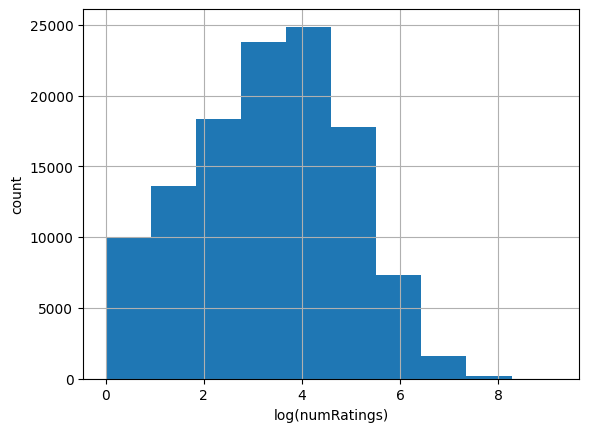

In [77]:
# Most notes have a small number of rating, a small number have very many ratinhgs
# This means the distribution of ratings is very skewed.
# We take the log of the number of ratings to make the distribution more normal


first_notes['log_numRatings']=np.log(first_notes['numRatings'])

first_notes['log_numRatings'].hist() #normal
plt.xlabel('log(numRatings)')
plt.ylabel('count')
plt.show()



In [78]:
# Most notes don't receive enough ratings to be labelled helpful (and shown), or label unhelpful

first_notes['finalRatingStatus'].value_counts()

finalRatingStatus
NEEDS_MORE_RATINGS             104861
CURRENTLY_RATED_HELPFUL          7867
CURRENTLY_RATED_NOT_HELPFUL      4782
Name: count, dtype: int64

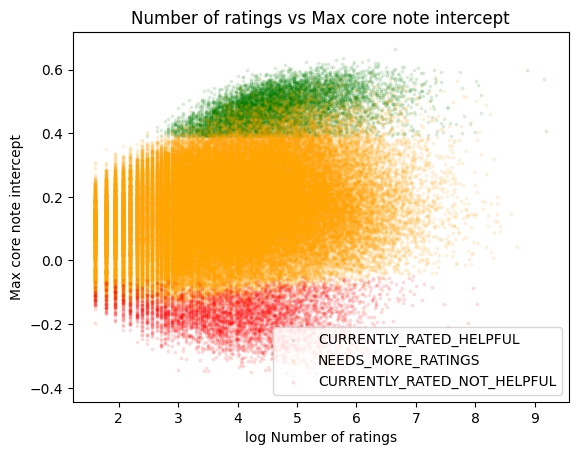

In [80]:
# Plotting log(numRatings) vs coreNoteInterceptMax, with colours according to Note final statuys (finalRatingStatus )  
plt.clf()
groups = ['CURRENTLY_RATED_HELPFUL','NEEDS_MORE_RATINGS','CURRENTLY_RATED_NOT_HELPFUL']
colours=['green','orange','red']

ms=3;alphaval=0.1;

for i in range(3):
    plt.scatter(first_notes[first_notes['finalRatingStatus']==groups[i]]['log_numRatings'], first_notes[first_notes['finalRatingStatus']==groups[i]]['coreNoteIntercept'], s = ms,alpha=alphaval,color=colours[i],label=groups[i])  
    i+=1

plt.xlabel('log Number of ratings')
plt.ylabel('Max core note intercept')
plt.title('Number of ratings vs Max core note intercept')
plt.legend(loc=0)
plt.savefig('scatter_numRatings_coreNoteIntercept.png',dpi=120,bbox_inches='tight')
plt.show()

#TODO make the legend markers bigger and clearer

### Notes on notes
Check the behaviour of Notes on Notes (labeled Notes Not Needed or NNN). 

In [5]:
print(notes['classification'].value_counts())

classification
MISINFORMED_OR_POTENTIALLY_MISLEADING    1523196
NOT_MISLEADING                            451263
Name: count, dtype: int64


Such a huge number! Let's see its percentage:

In [6]:
print(notes['classification'].value_counts(normalize=True))

classification
MISINFORMED_OR_POTENTIALLY_MISLEADING    0.77145
NOT_MISLEADING                           0.22855
Name: proportion, dtype: float64


In [7]:
not_misleading = notes[notes['classification'] == 'NOT_MISLEADING']['summary']

In [8]:
not_misleading.sample(50)

1481917                            This typo is obvious, NNN
1453626    While the President is not able to fire the di...
1309502    NNN. Potential CN uses biased media. Moreover,...
956411     NNN The original post is about the events of 2...
755423                                 NNN - so was the note
1470825    OP probably does need to touch grass but still...
168973     NNN this is an opinion. Argue in the comments ...
1864576    Regular gym attendance promotes long-term heal...
1508053    NNN This person is clearly expressing an opini...
1961681    NNN - April 1st is predicated on the idea that...
329611     NNN Chicos, por favor, las notas de la comunid...
1658733    NNN. The OP is clearly asking a question and n...
1054039                             NNN, kein Kontext nötig.
991334     NNN - what? If you think he's sharing false in...
993040     NNN - Note inutile sur ce post il s’agit évide...
1634290    NO NOTE NEEDED!  OP is clearly quoting Elon Mu...
837450     greg is corre

In [ ]:
# check helpfulness of NNs
notes_and_status = pd.read_parquet('notes_current_stat.parquet', engine='auto')
notes_and_status.columns

Index(['noteId', 'classification', 'createdAt', 'createdAtYear',
       'createdAtMonth', 'noteAuthorParticipantId', 'tweetId', 'currentStatus',
       'summary'],
      dtype='object')

In [10]:
# check helpfulness of NNs
rated = pd.read_parquet('rated_notes_compact.parquet', engine='auto')
rated.columns

Index(['noteId', 'finalRatingStatus', 'classification', 'createdAtMillis',
       'createdAt', 'createdAtYear', 'createdAtMonth', 'numRatings',
       'noteAuthorParticipantId', 'tweetId', 'firstNonNMRStatus',
       'currentStatus', 'mostRecentNonNMRStatus', 'lockedStatus',
       'coreNoteIntercept', 'coreNoteFactor1', 'coreRatingStatus', 'decidedBy',
       'expansionNoteIntercept', 'expansionNoteFactor1',
       'expansionRatingStatus', 'coverageNoteIntercept', 'coverageNoteFactor1',
       'coverageRatingStatus', 'coreNoteInterceptMin', 'coreNoteInterceptMax',
       'expansionNoteInterceptMin', 'expansionNoteInterceptMax',
       'coverageNoteInterceptMin', 'coverageNoteInterceptMax',
       'groupNoteIntercept', 'groupNoteFactor1', 'groupRatingStatus',
       'groupNoteInterceptMax', 'groupNoteInterceptMin', 'modelingGroup',
       'summary', 'isMediaNote'],
      dtype='object')

In [ ]:
# check if we can use column currentStatus from note_History instead of 
# finalRatingStatus from running scored note algorithm
(rated['currentStatus'] == rated['finalRatingStatus']).sum() / len(rated)

np.float64(0.9558614192094087)

It looks like more in more than 95% of the times, the two columns agree. We are safe to move forward with currentStatus (since we haven't run the rating algorithm on 2025 data)

In [19]:
notes_and_status['createdAt'].max()

Timestamp('2025-07-02 03:02:32.532000')

In [20]:
rated['createdAt'].max()

Timestamp('2025-02-24 03:36:28.959000')

In [22]:
notes_and_status[notes_and_status['classification'] == 'NOT_MISLEADING']['currentStatus']\
    .value_counts(normalize=True)

currentStatus
NEEDS_MORE_RATINGS             0.945208
CURRENTLY_RATED_NOT_HELPFUL    0.054787
CURRENTLY_RATED_HELPFUL        0.000004
Name: proportion, dtype: float64

Interseting. Very few of them are recognized helpful! If we remove them, the actual notes have much higher chance of being helpful!

In [23]:
notes_and_status[notes_and_status['classification'] != 'NOT_MISLEADING']['currentStatus']\
    .value_counts(normalize=True)

currentStatus
NEEDS_MORE_RATINGS             0.853135
CURRENTLY_RATED_HELPFUL        0.118194
CURRENTLY_RATED_NOT_HELPFUL    0.028671
Name: proportion, dtype: float64

In [24]:
notes_and_status['currentStatus'].value_counts(normalize=True)

currentStatus
NEEDS_MORE_RATINGS             0.875243
CURRENTLY_RATED_HELPFUL        0.089815
CURRENTLY_RATED_NOT_HELPFUL    0.034942
Name: proportion, dtype: float64

AND let's check how many of first notes were NNN

In [26]:
notes_and_status.groupby('noteAuthorParticipantId')['classification'].head(1).value_counts('normalized')

classification
MISINFORMED_OR_POTENTIALLY_MISLEADING    0.744565
NOT_MISLEADING                           0.255435
Name: proportion, dtype: float64